# Examen Segundo Parcial (Práctico)
### Laboratorio de Aprendizaje Estadístico

José Armando Melchor Soto  | 745697

--- 




### Librerías: 

In [733]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
import warnings
import numpy as np
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import discriminant_analysis, neighbors
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

warnings.simplefilter(action='ignore', category=FutureWarning)

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

---

### Dataset : 
Recursos Humanos

In [734]:
df = pd.read_csv('hr_role.csv')

#### Dummies

In [735]:
df = pd.get_dummies(df, drop_first=True)
df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,5993,19479,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,5130,24907,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,2090,2396,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,2909,23159,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,3468,16632,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,2571,12290,...,True,False,False,False,False,False,False,True,False,False
1466,39,613,6,1,4,42,2,3,9991,21457,...,False,False,False,False,False,False,False,True,False,False
1467,27,155,4,3,2,87,4,2,6142,5174,...,False,False,True,False,False,False,False,True,False,True
1468,49,1023,2,3,4,63,2,2,5390,13243,...,False,False,False,False,False,True,False,True,False,False


### Visualización del Dataset

In [736]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,5993,19479,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,5130,24907,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,2090,2396,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,2909,23159,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,3468,16632,...,True,False,False,False,False,False,False,True,False,False


### Explicación de las variables

---

#### Se busca predecir si está satisfecho

In [737]:
target= 'is_satisfied'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### NaN's

In [738]:
pd.DataFrame(df.isnull().sum()).T

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ninguna Variable tiene NaN's , así que podemos continuar

#### Función Calibración 

In [739]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y': y
    })
    
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False) + 1
    gropuped = df_calibracion.groupby('bins').mean()
    
    plt.plot(gropuped.predicciones, gropuped.y, label="Modelo", marker="o")
    plt.plot(gropuped.predicciones, gropuped.predicciones, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")

##### Función Bivariado

In [740]:
def bivariado(df):
    num_features = df.iloc[:, :].columns
    df_numerical = df.iloc[:, :].copy()

    for feature in num_features:
        df_numerical[f'{feature}_bins'] = pd.qcut(df_numerical[feature], q=5, labels=False, duplicates='drop')

        if df_numerical[f'{feature}_bins'].isna().sum() > 0:
            print(f"Advertencia: {feature} tiene valores NaN en la segmentación.")

        grouped = df_numerical.groupby(f'{feature}_bins').mean()

        fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
        
        sns.lineplot(x=grouped[feature], y=grouped[target], marker='o', color='#b30000', ax=axes[0])
        axes[0].set_title(f'Relación de {feature} con {target}')
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel(target)
        axes[0].grid()

        sns.histplot(df_numerical[feature], bins=50, color='#b30000', edgecolor='black', kde=True, ax=axes[1])
        axes[1].set_title(f'Distribución de {feature}')
        axes[1].set_xlabel(feature)
        axes[1].set_ylabel('Frecuencia')

        plt.show()


#### Bivariado

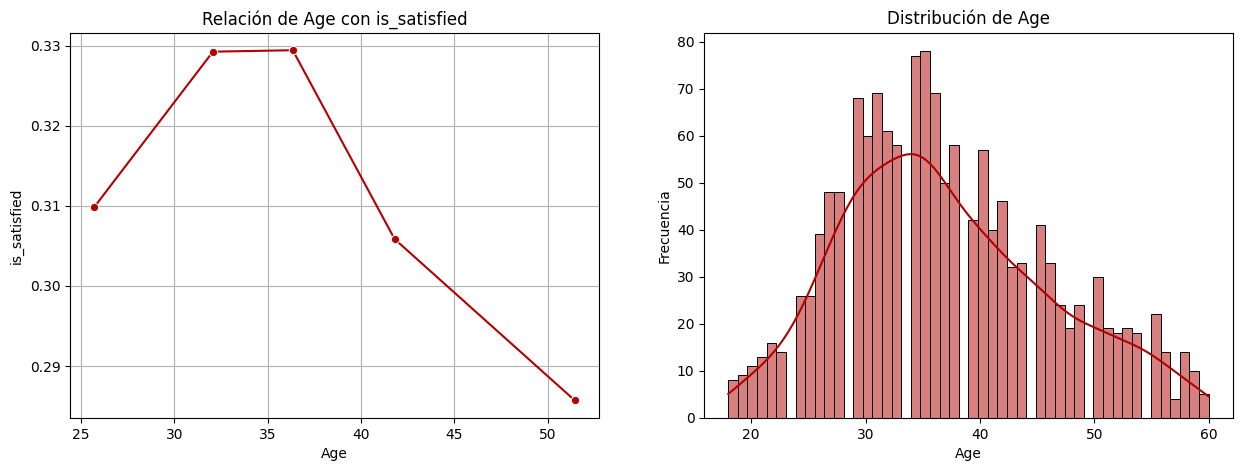

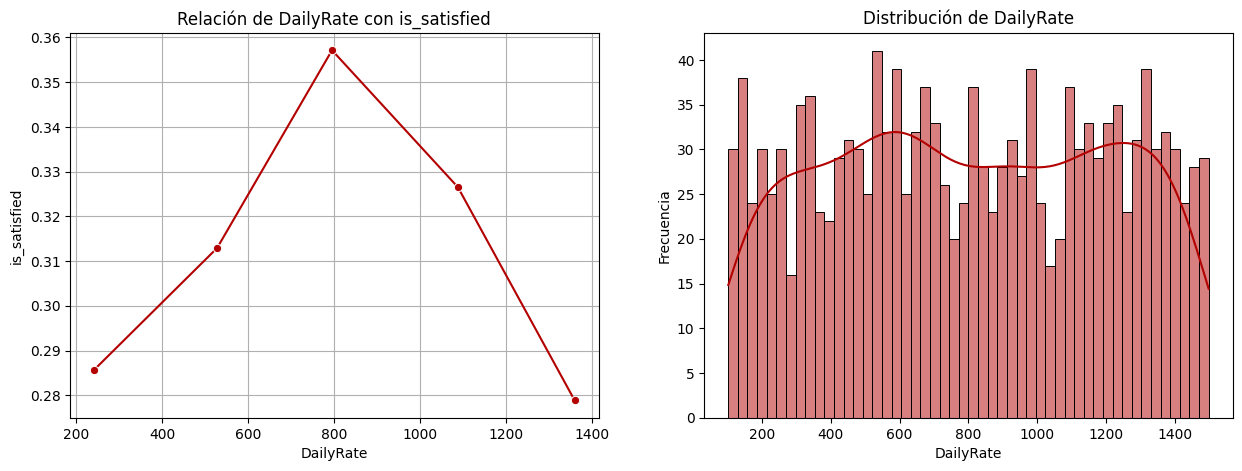

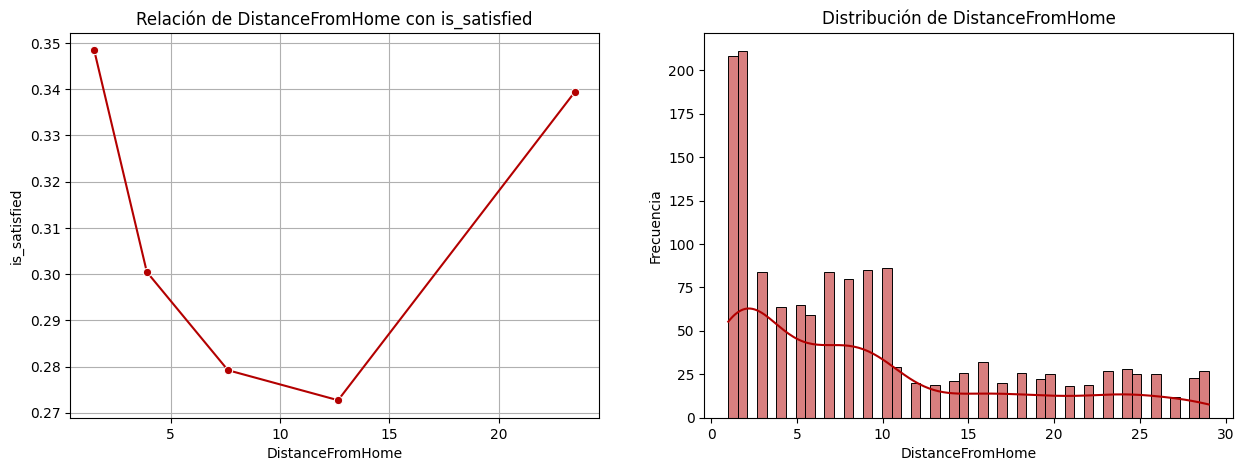

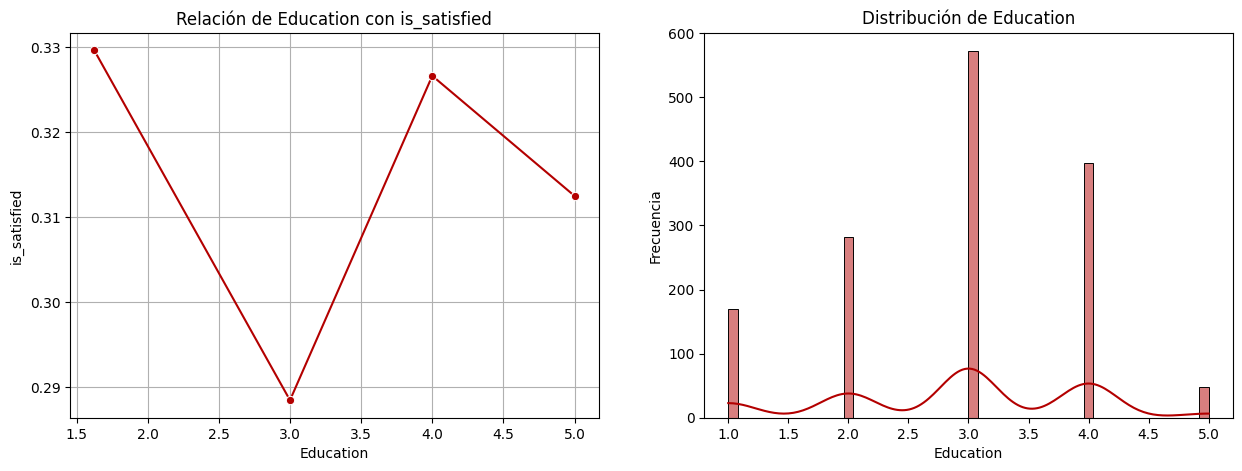

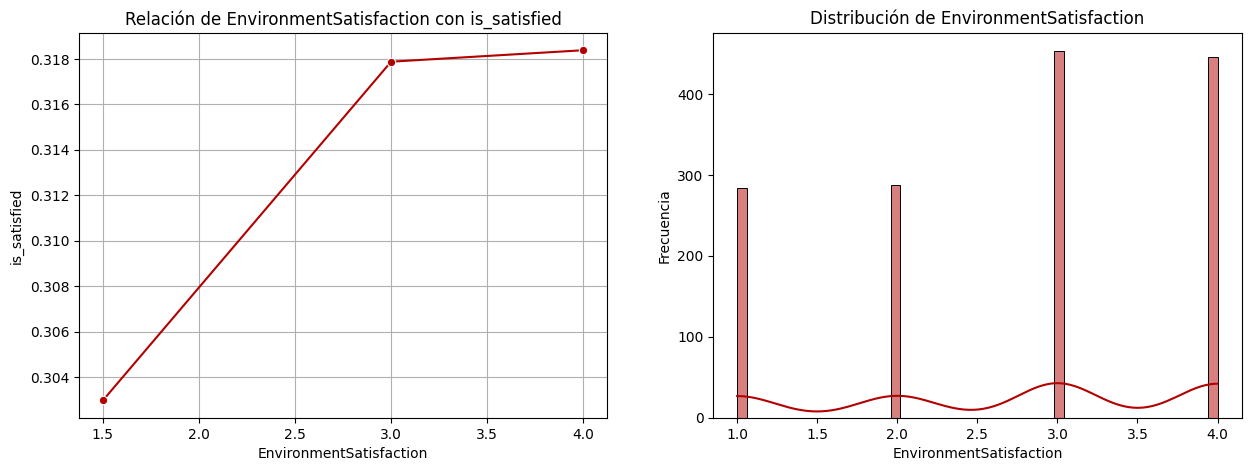

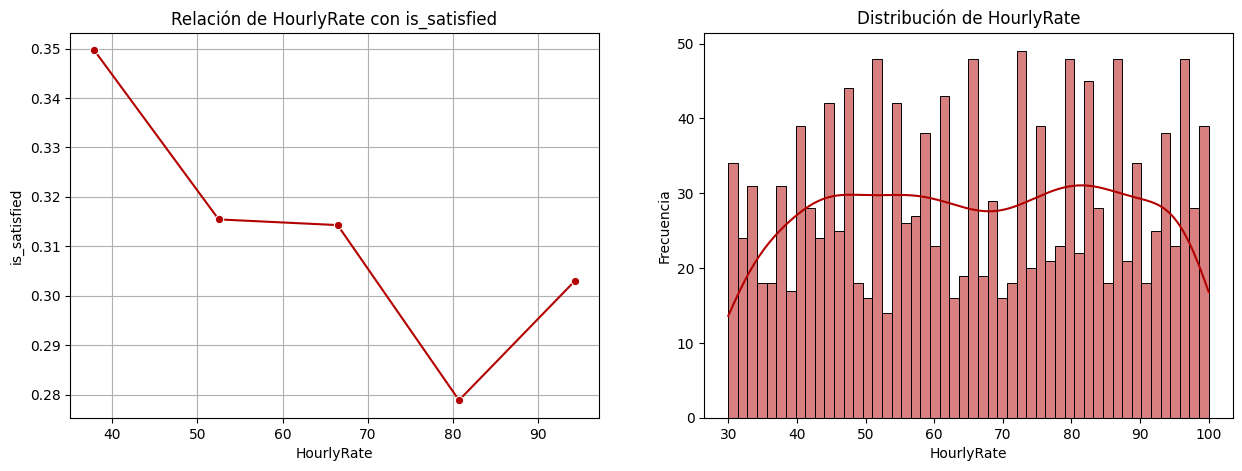

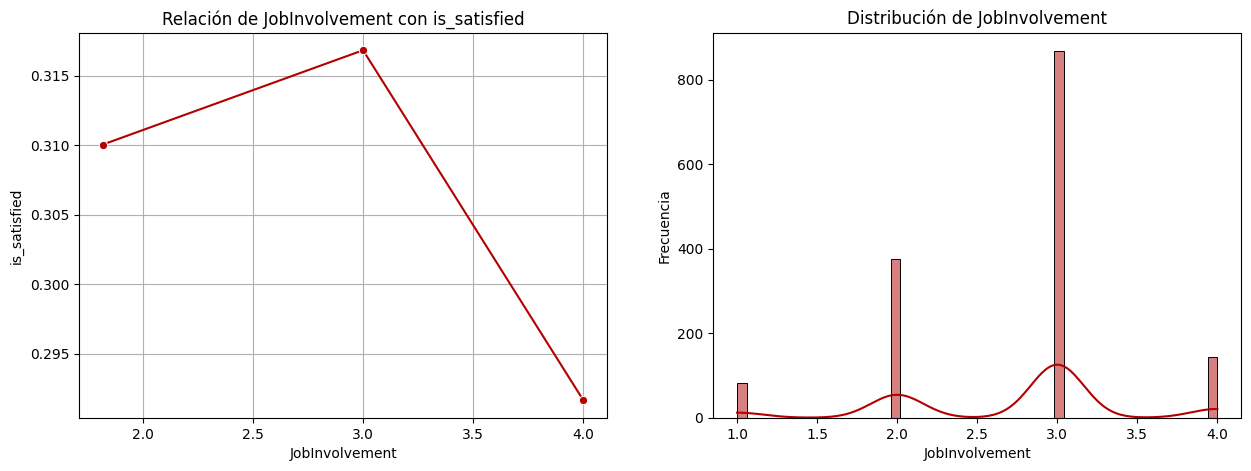

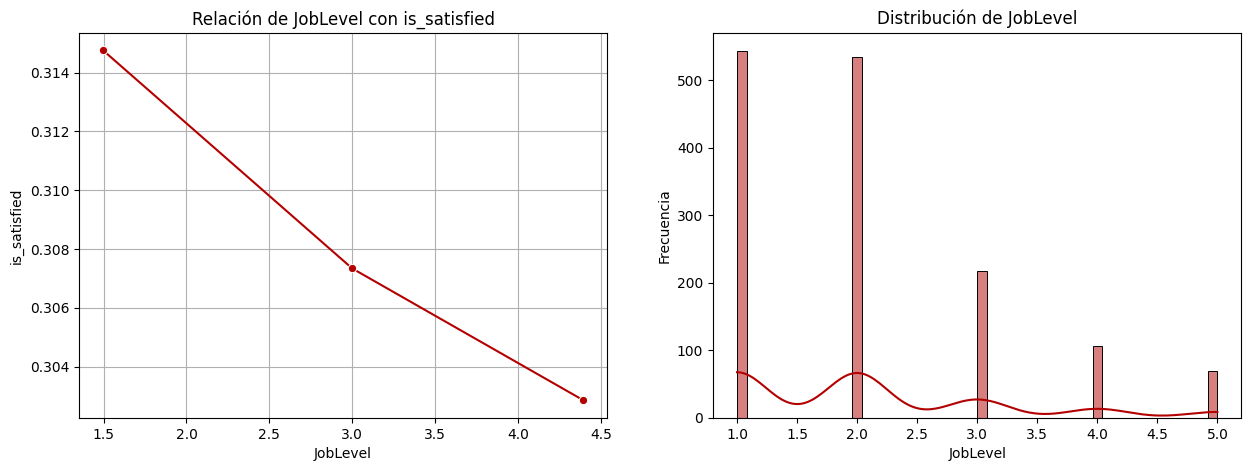

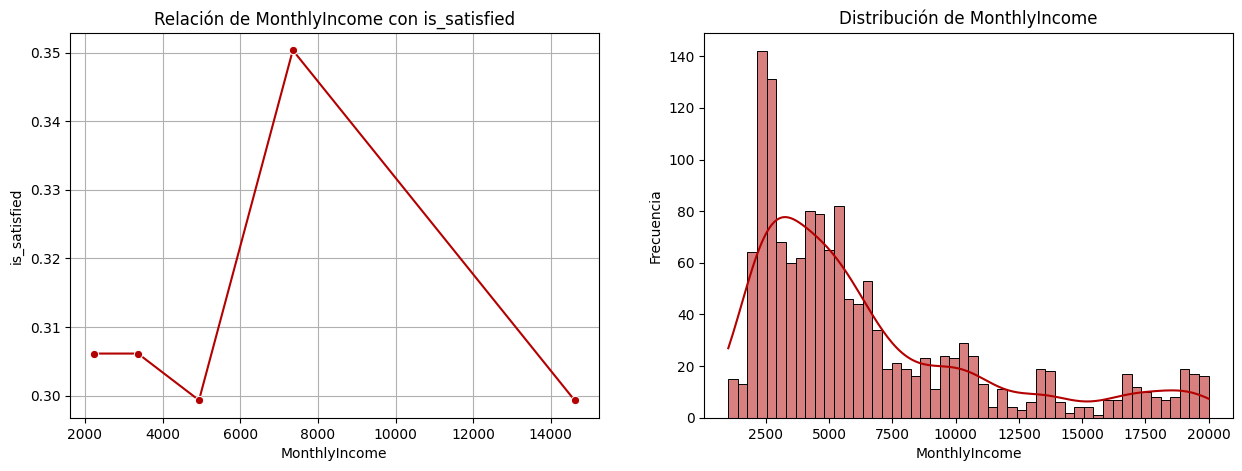

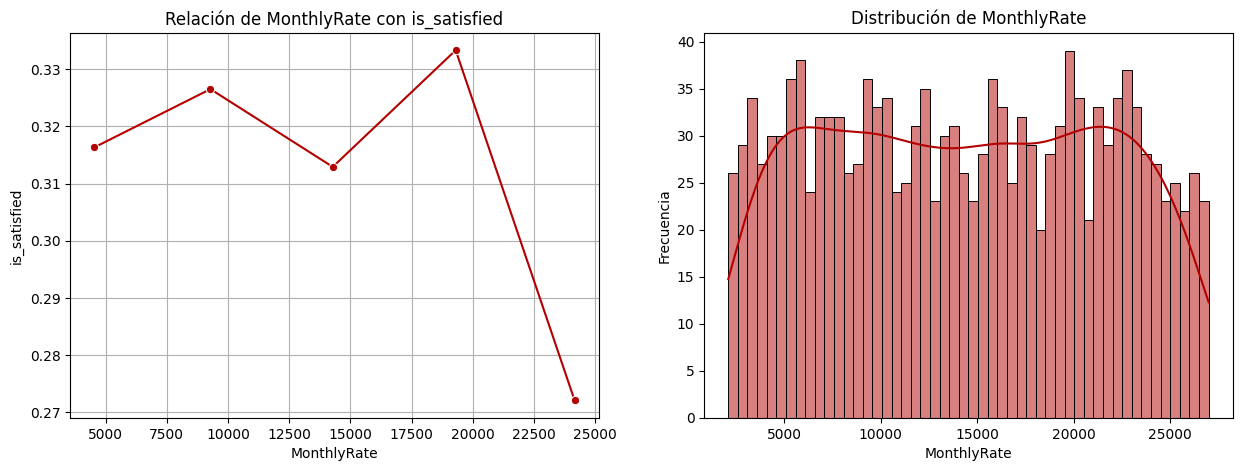

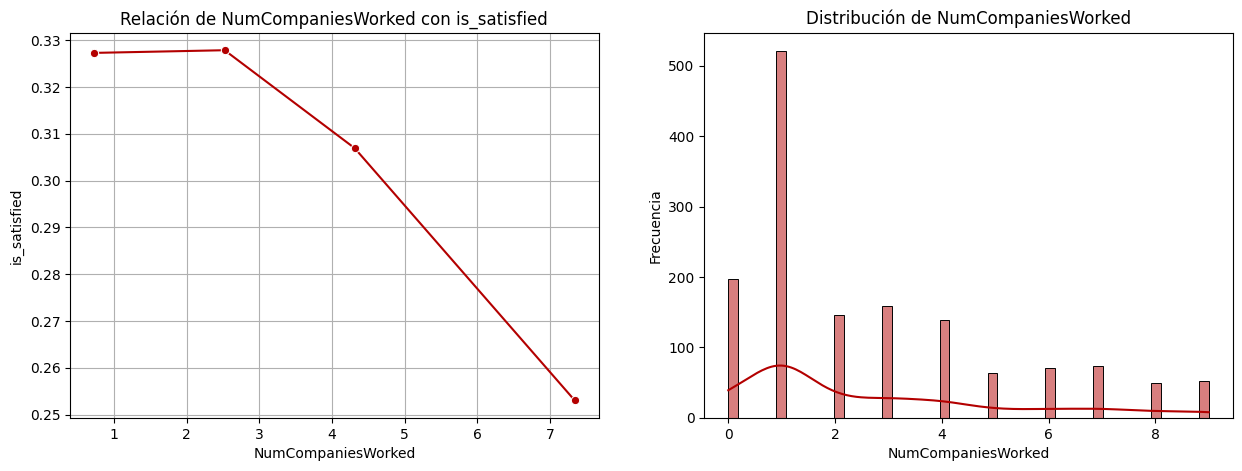

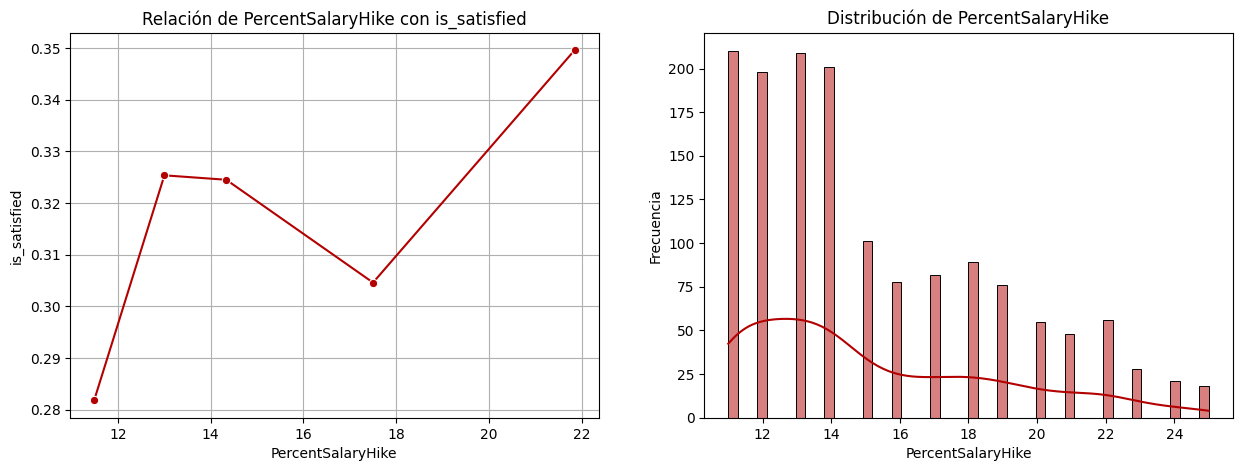

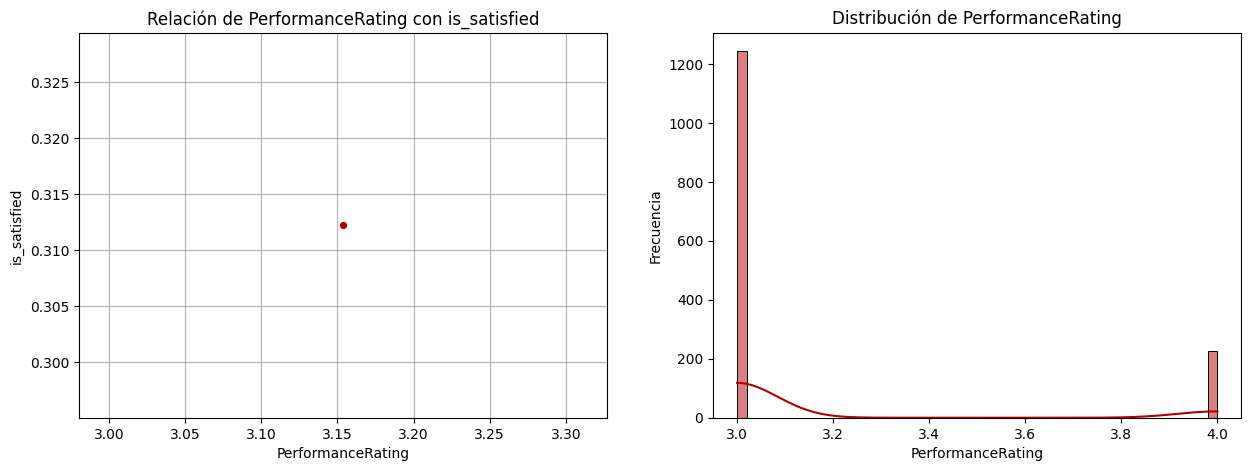

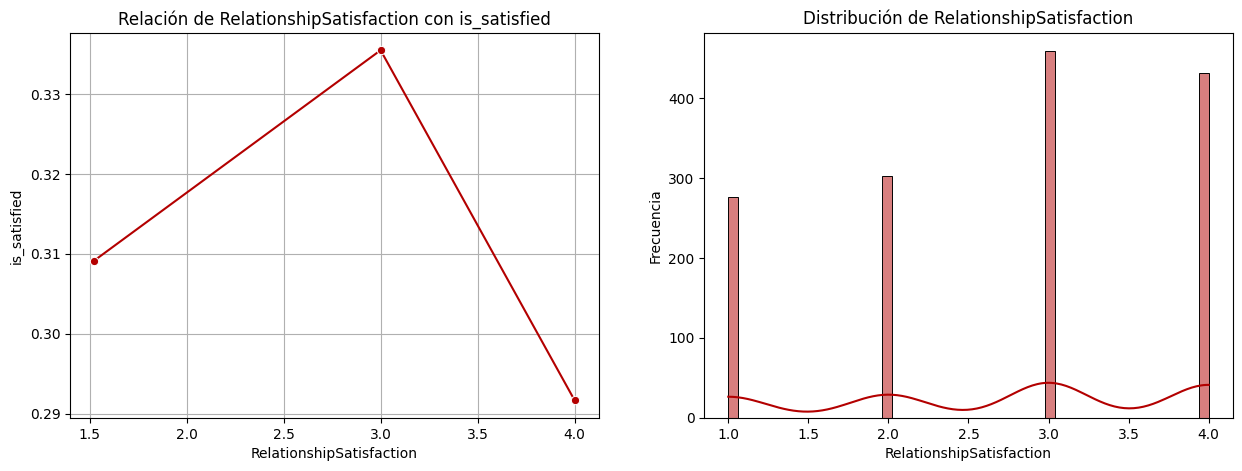

Advertencia: StandardHours tiene valores NaN en la segmentación.


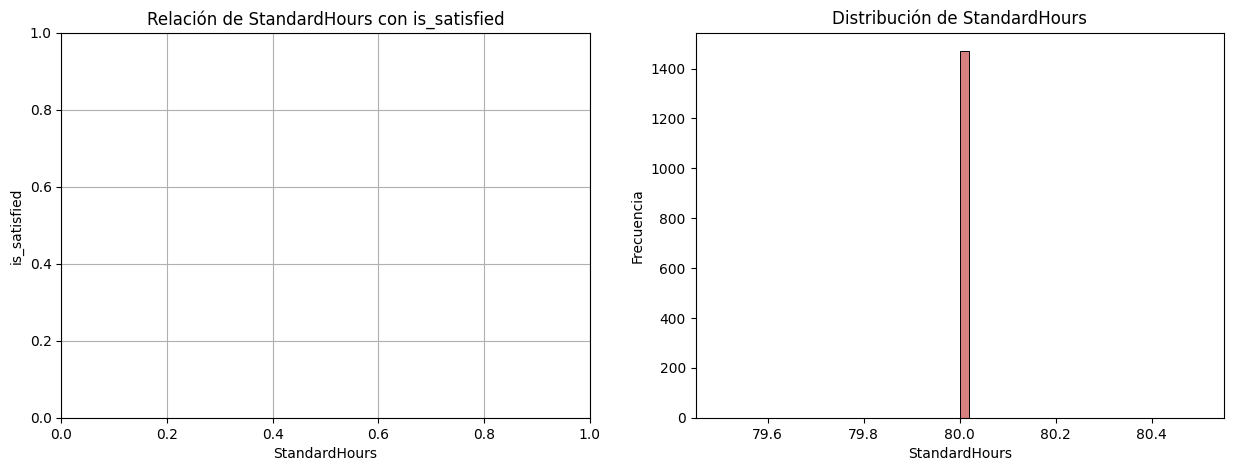

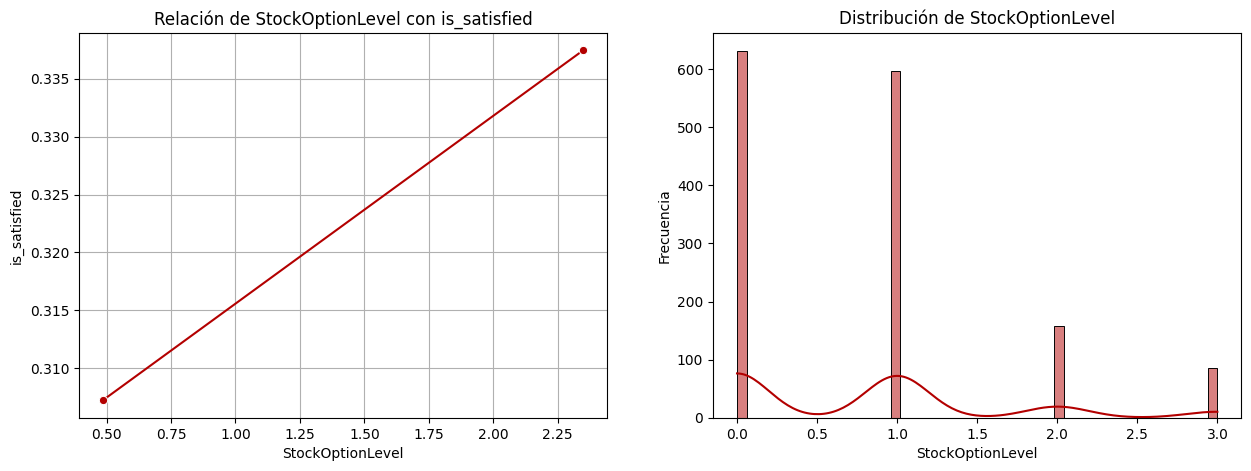

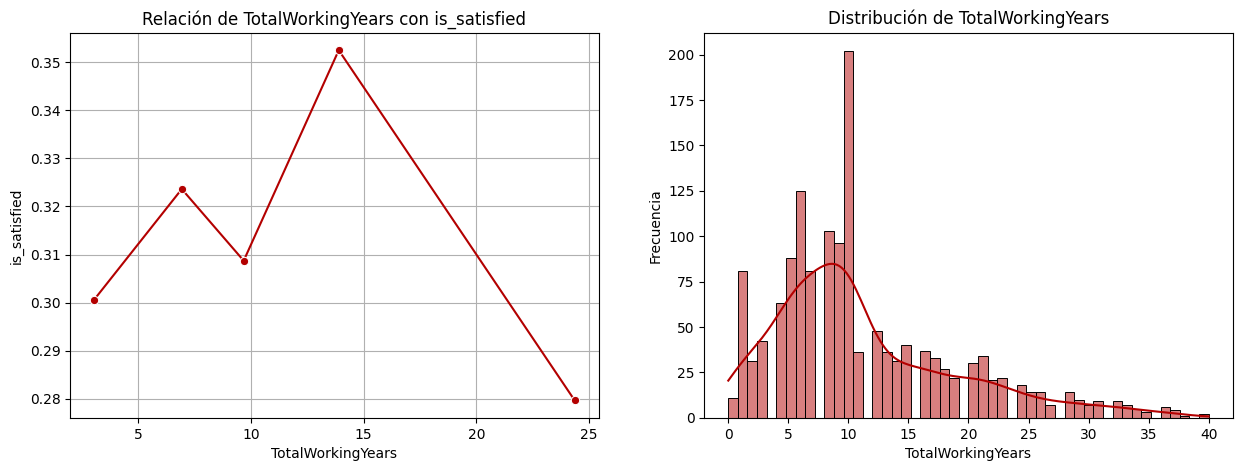

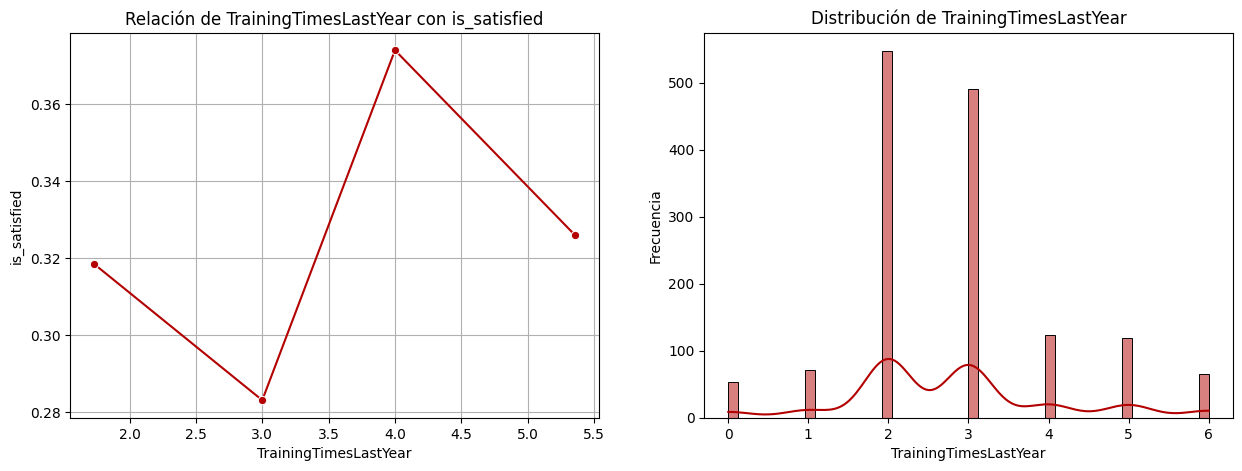

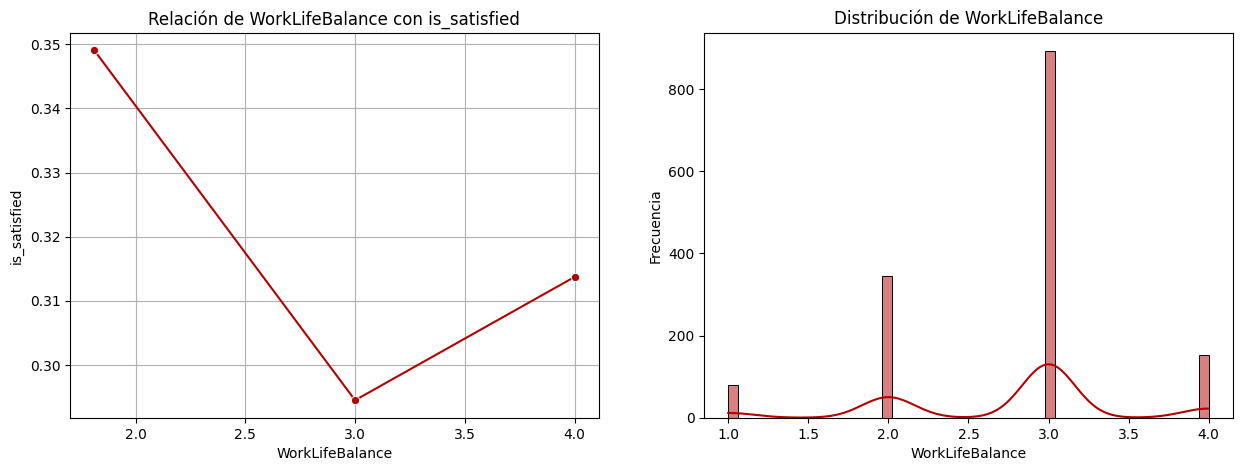

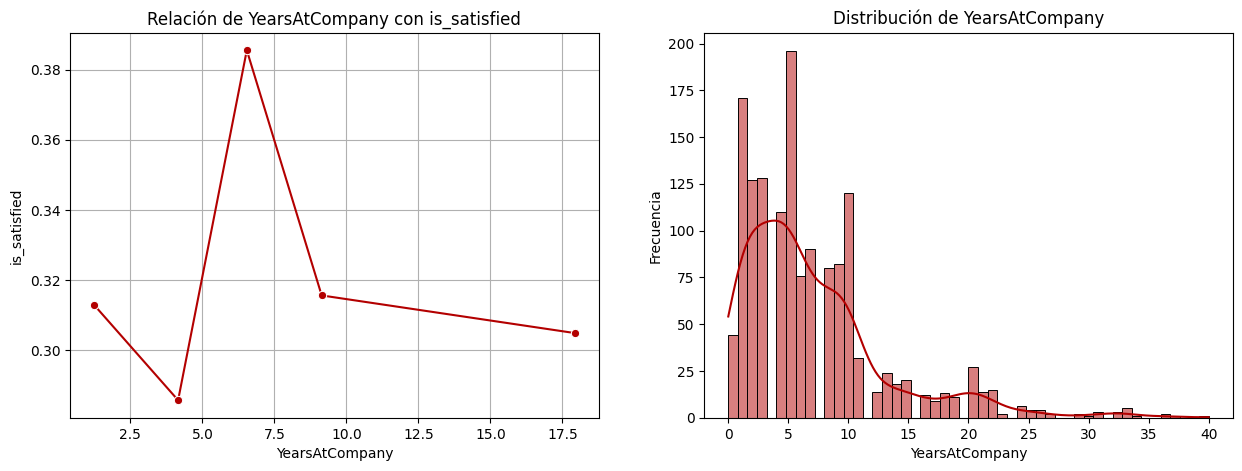

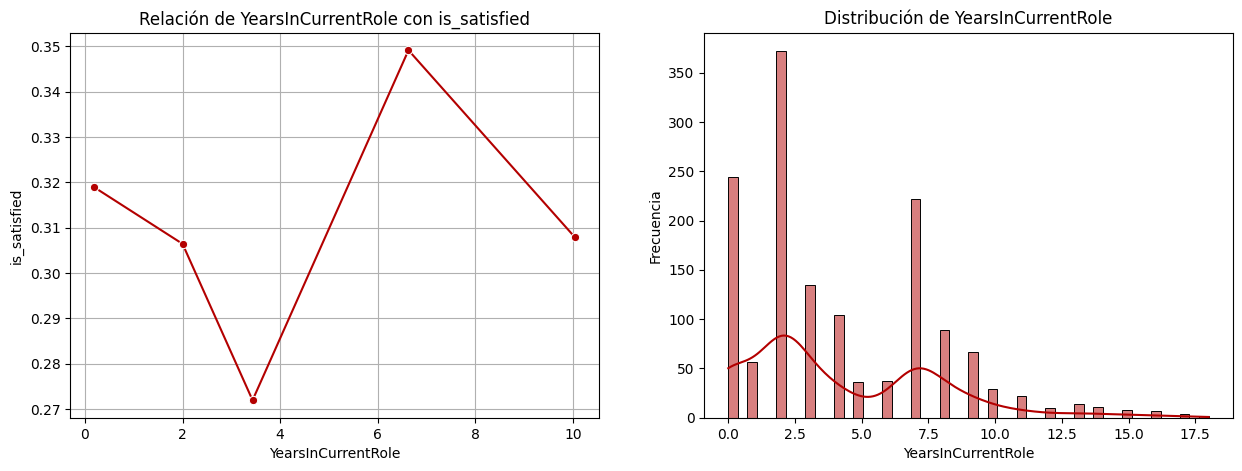

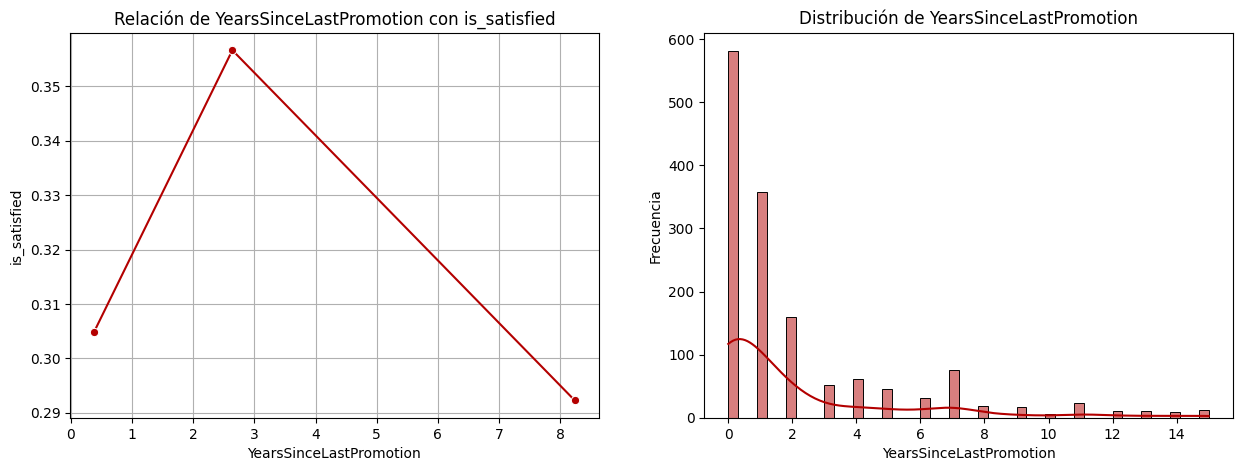

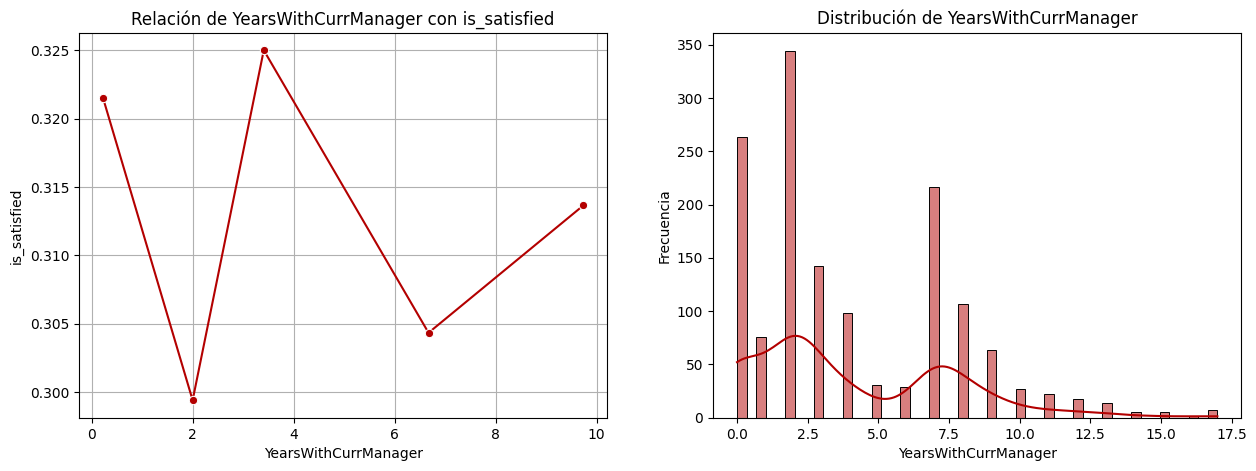

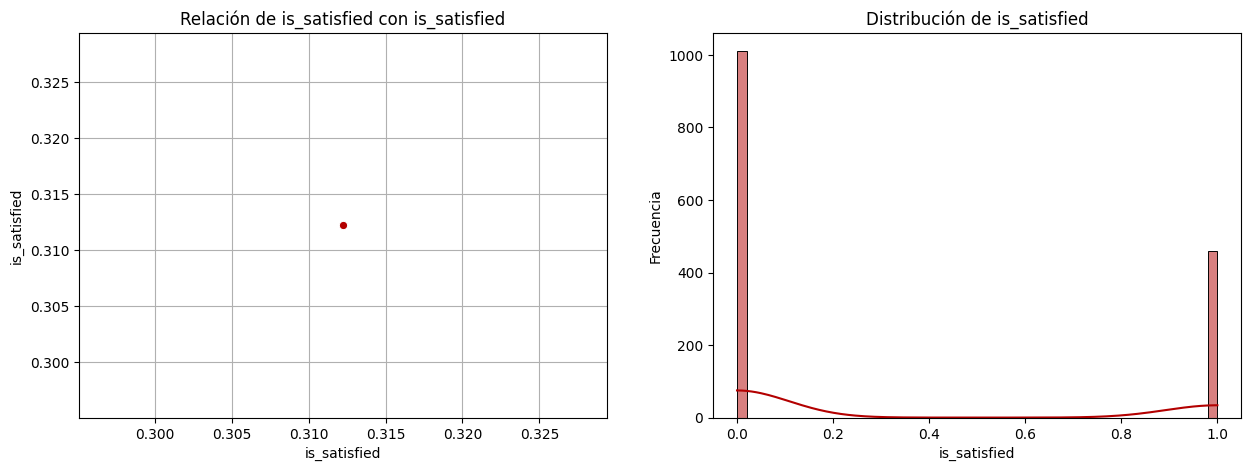

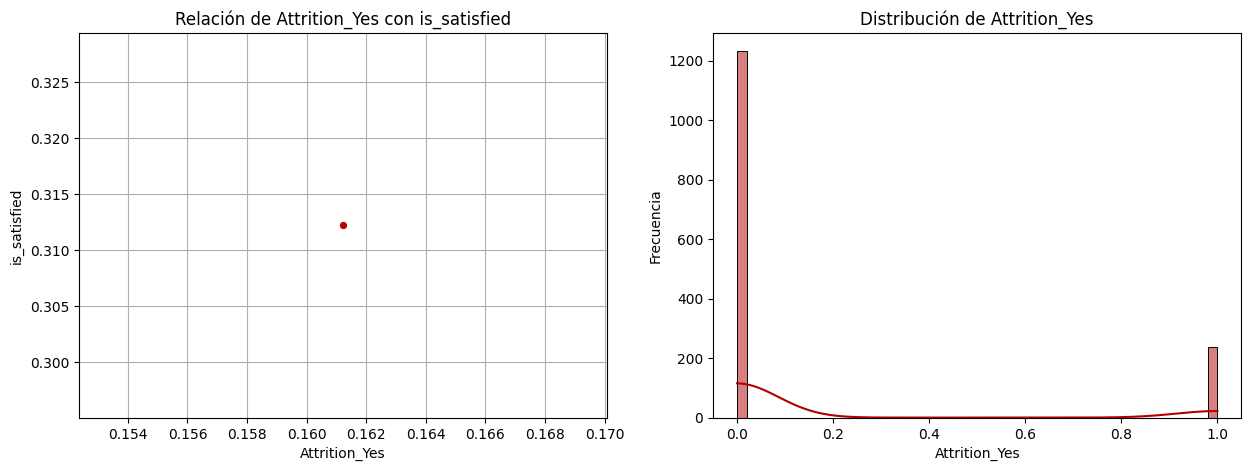

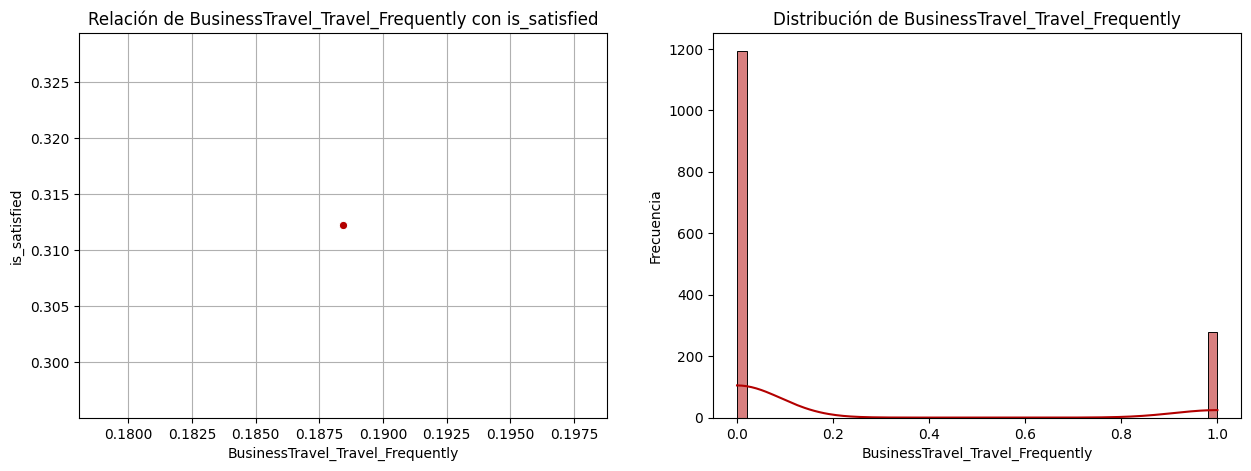

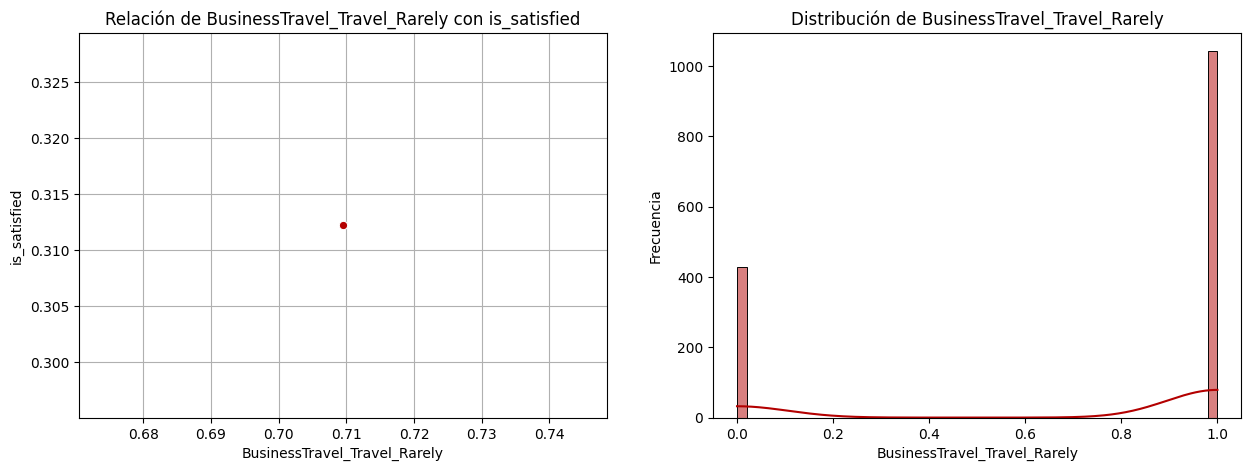

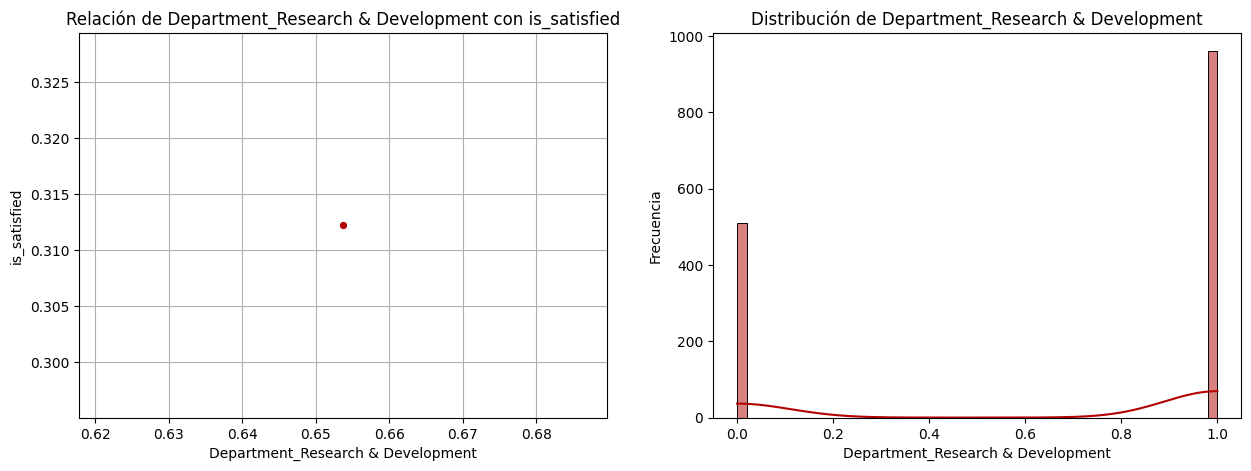

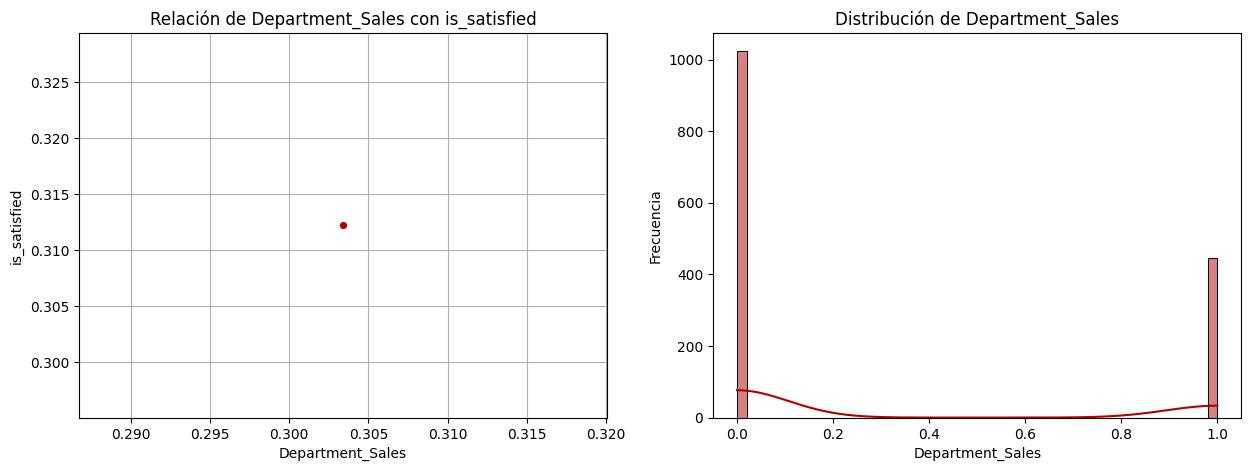

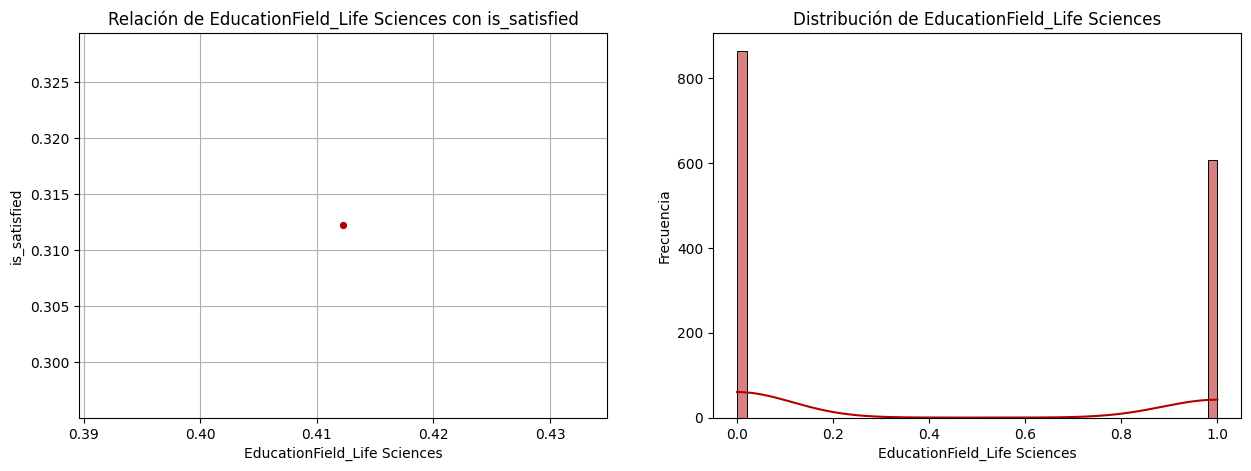

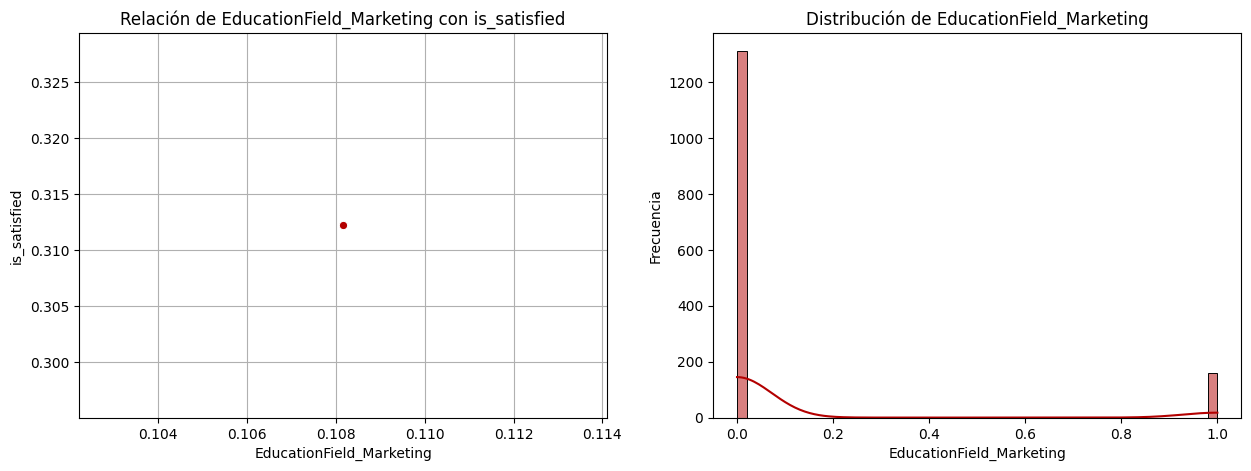

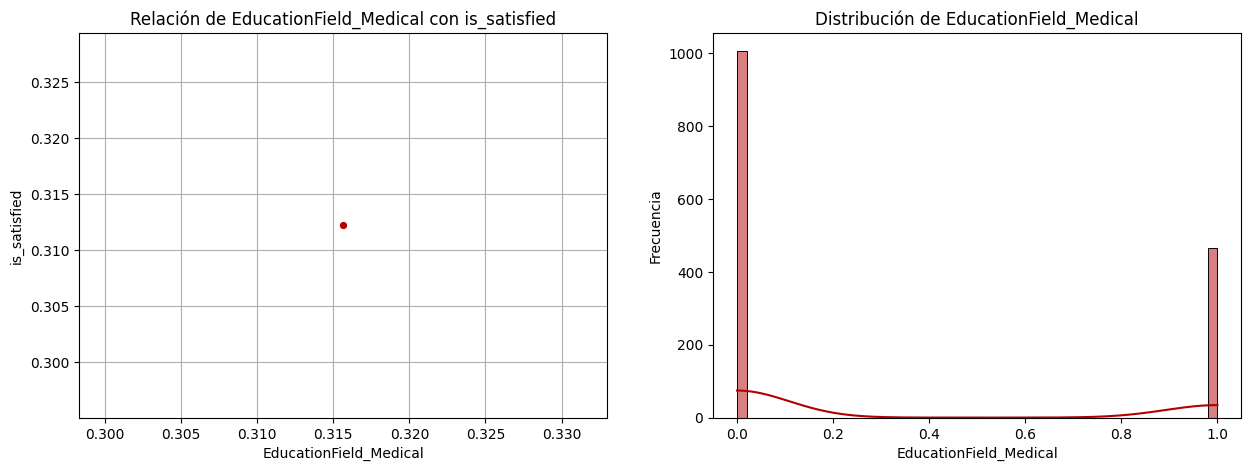

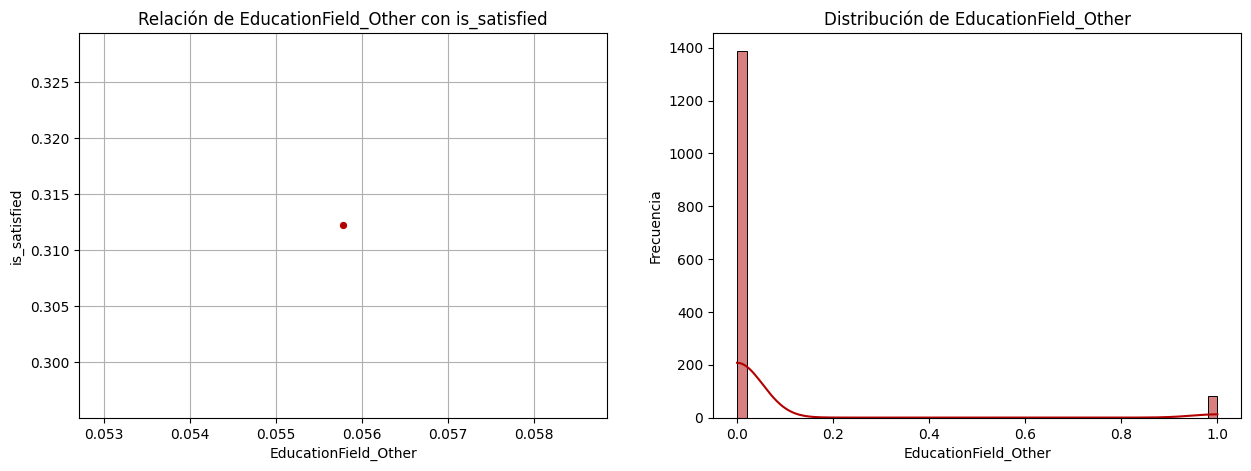

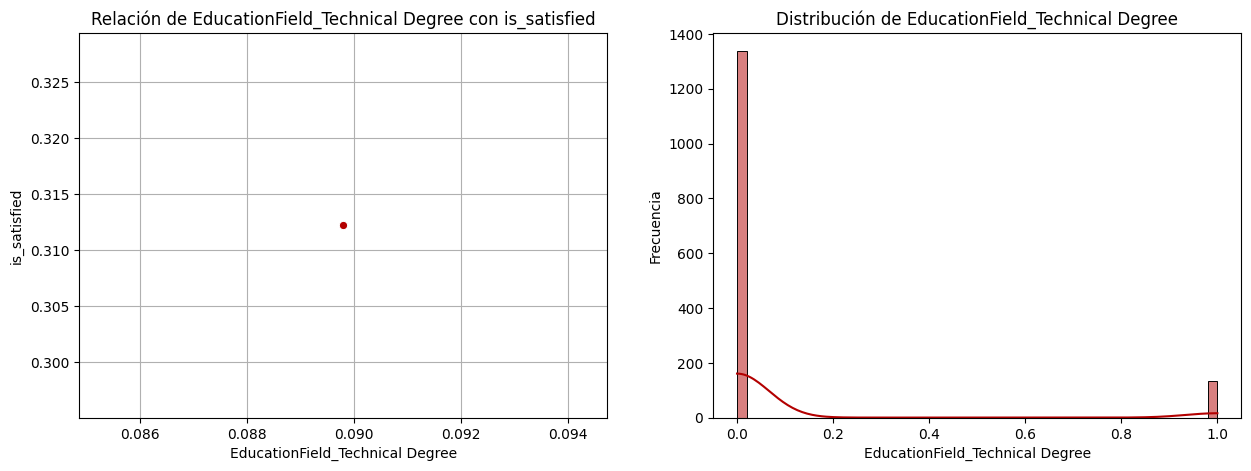

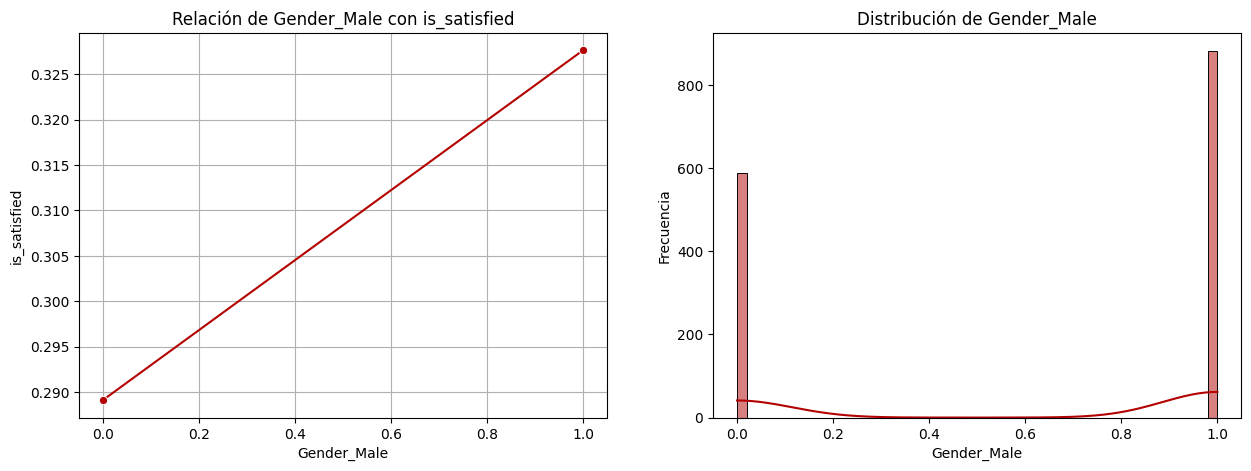

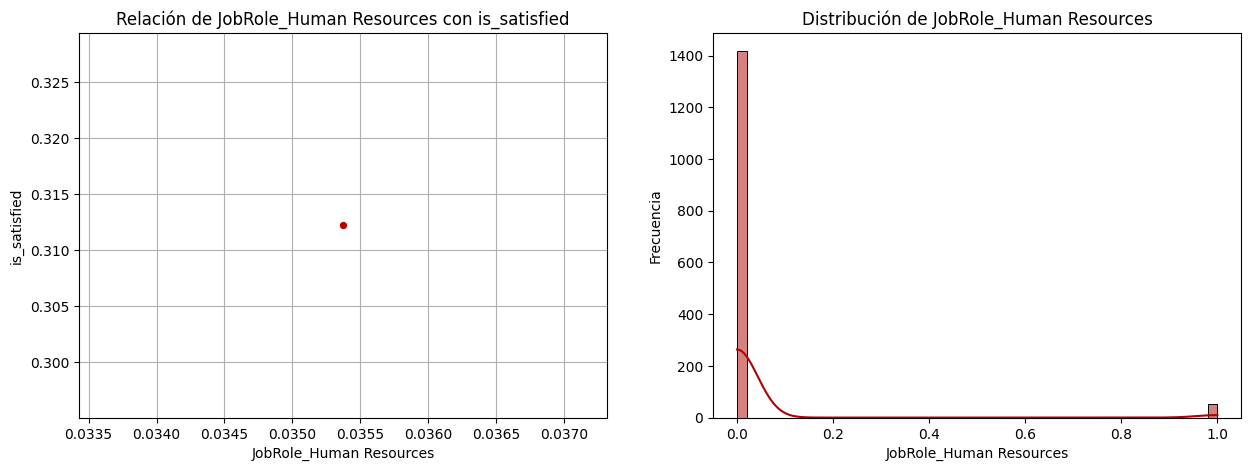

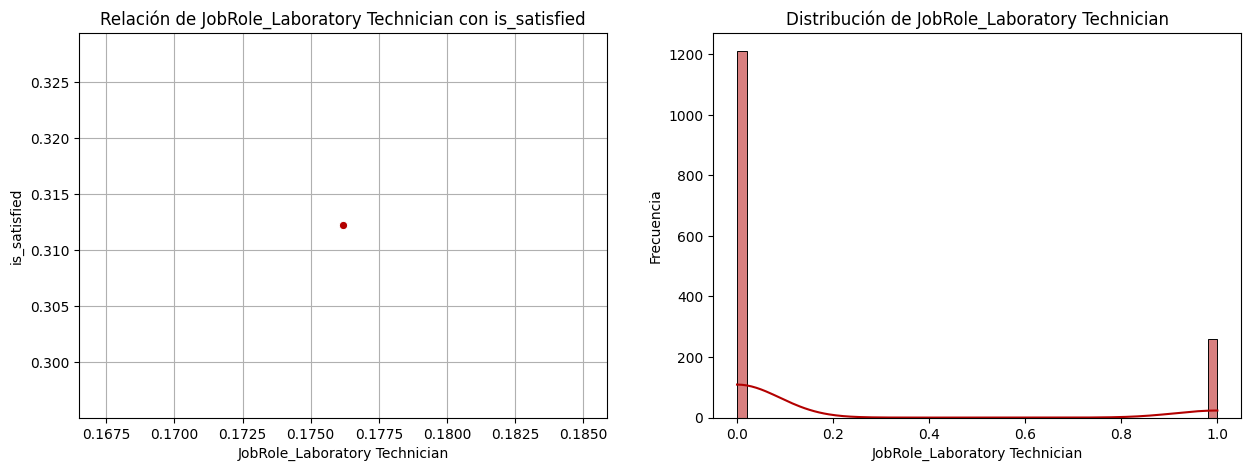

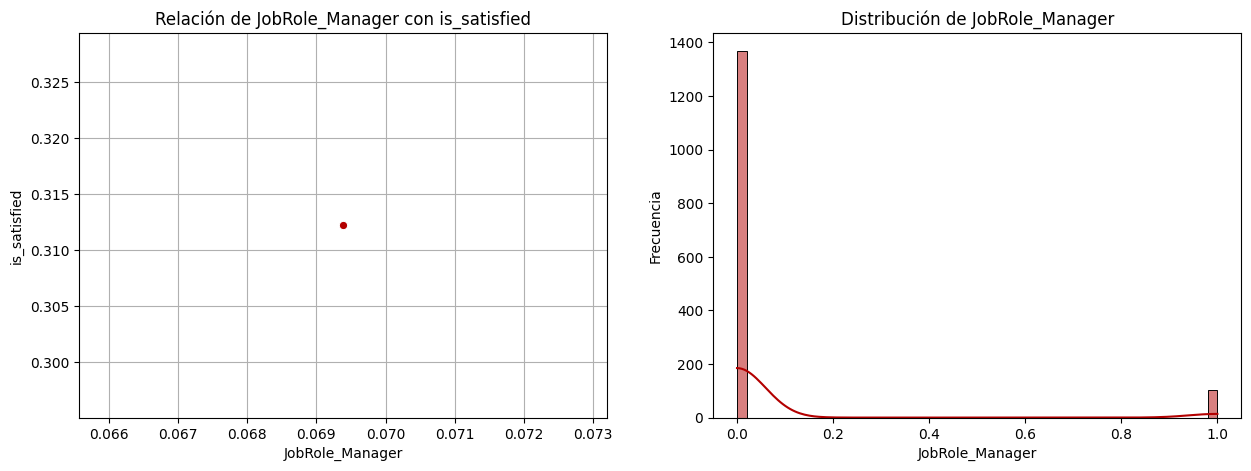

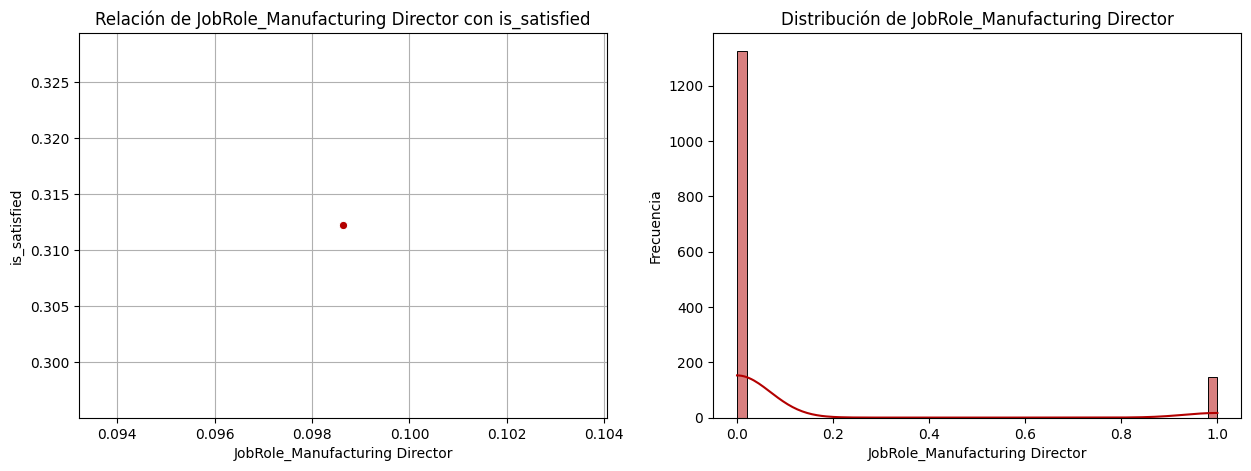

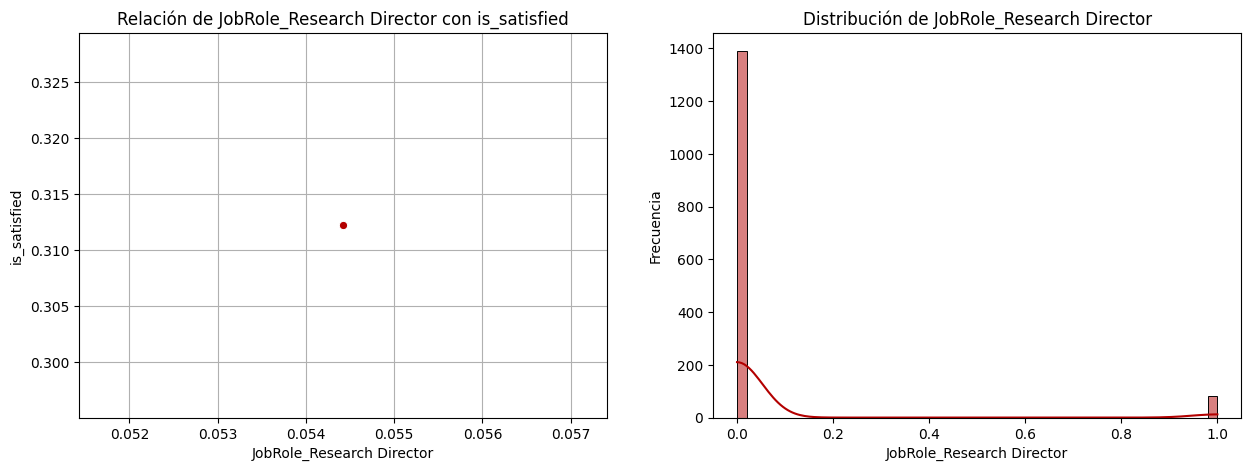

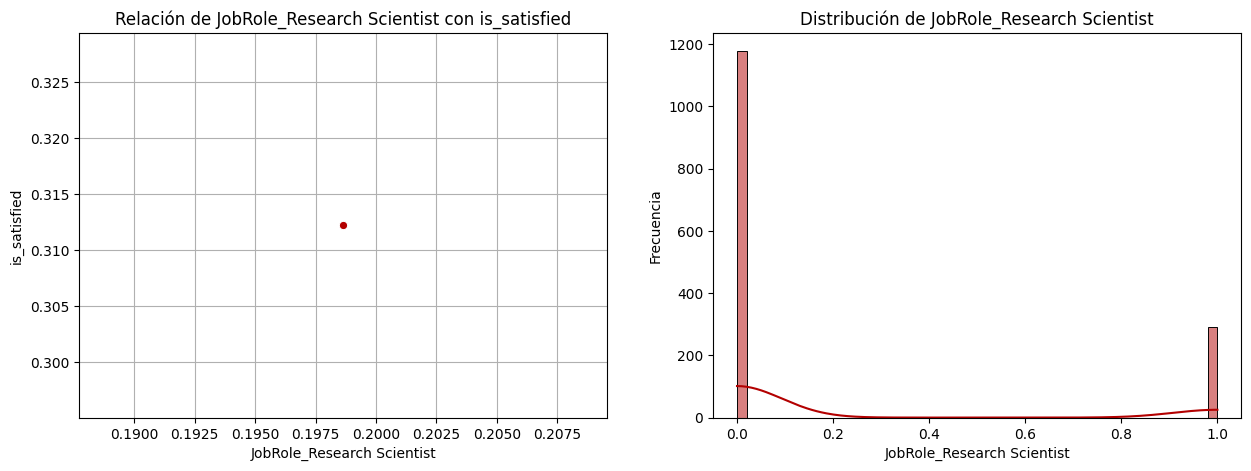

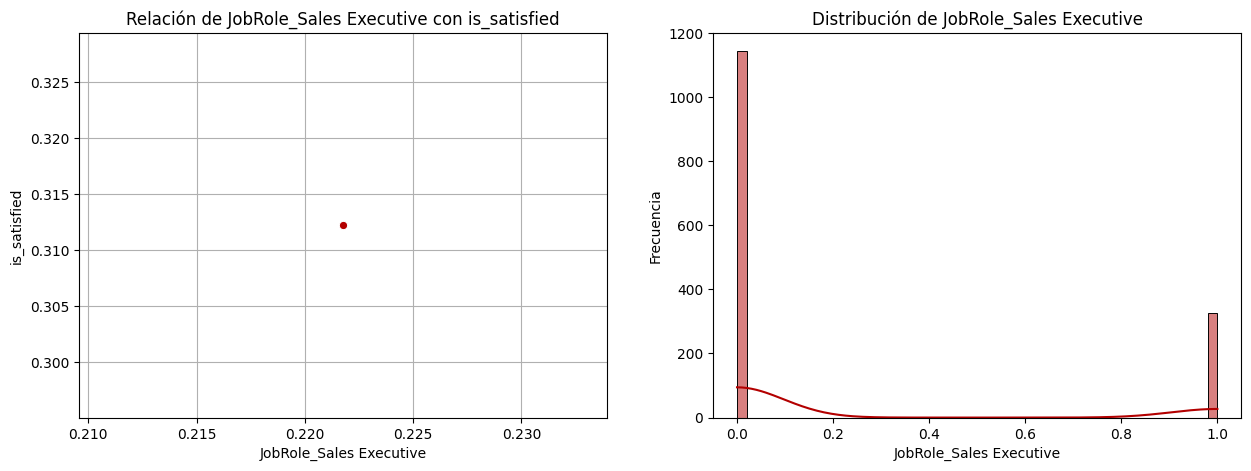

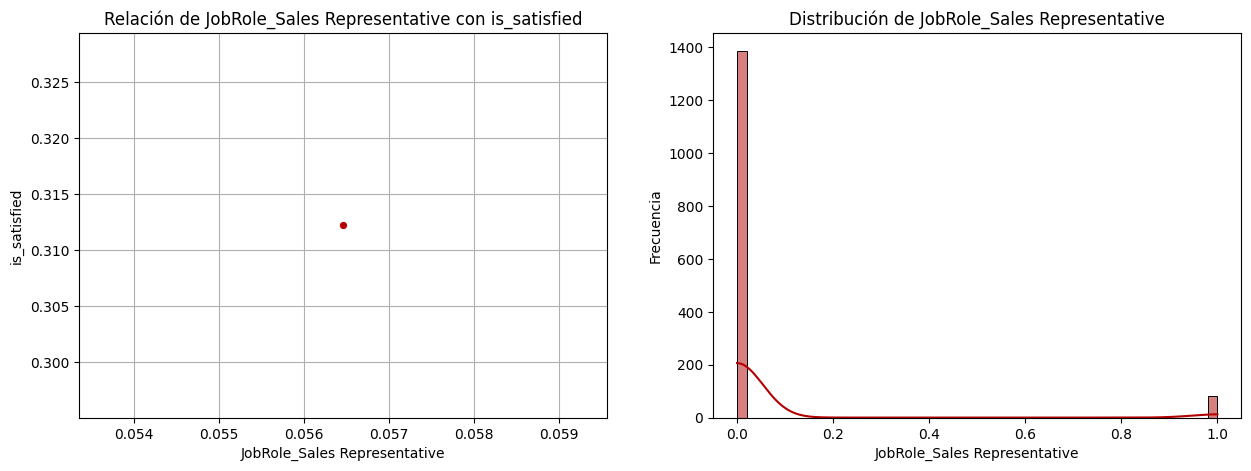

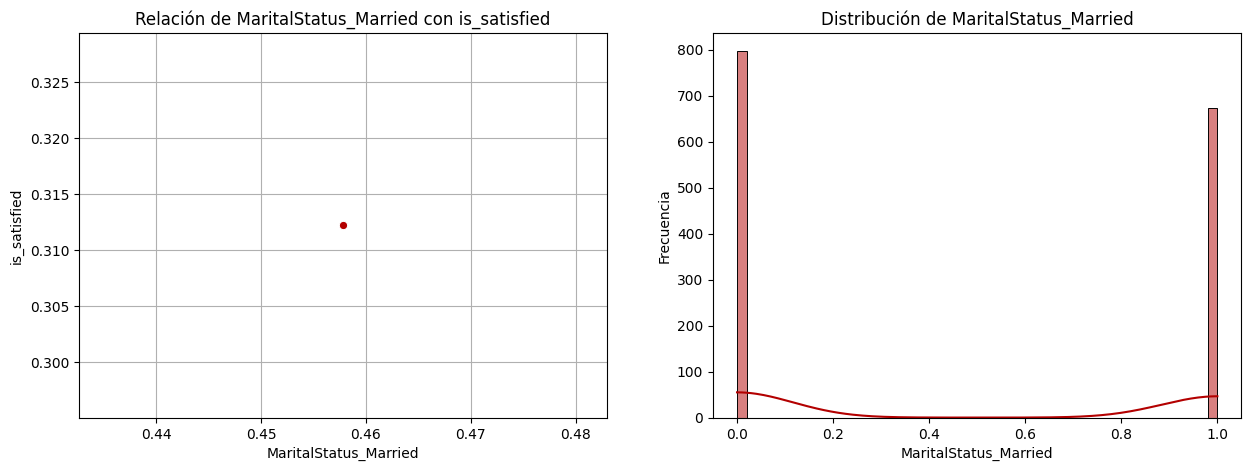

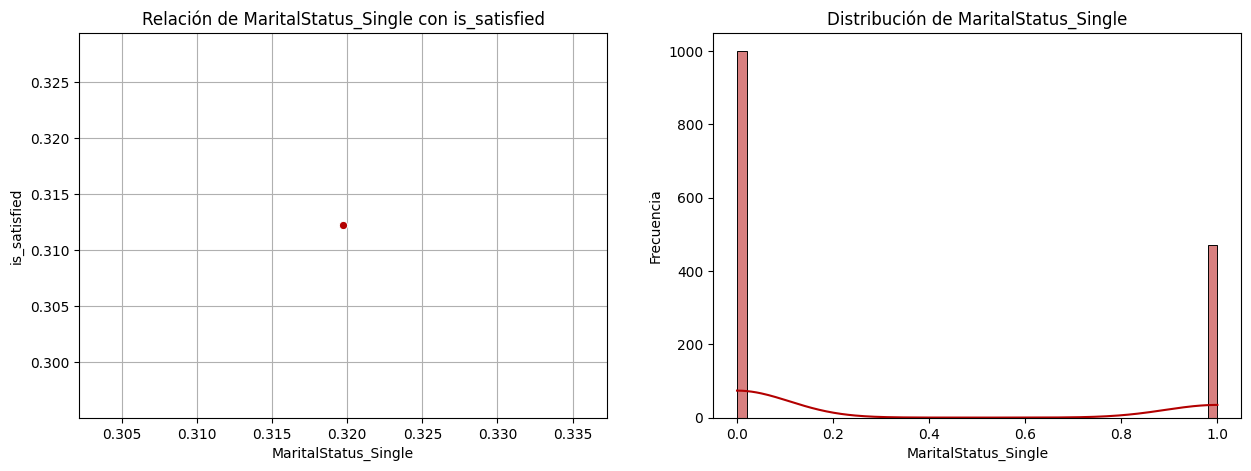

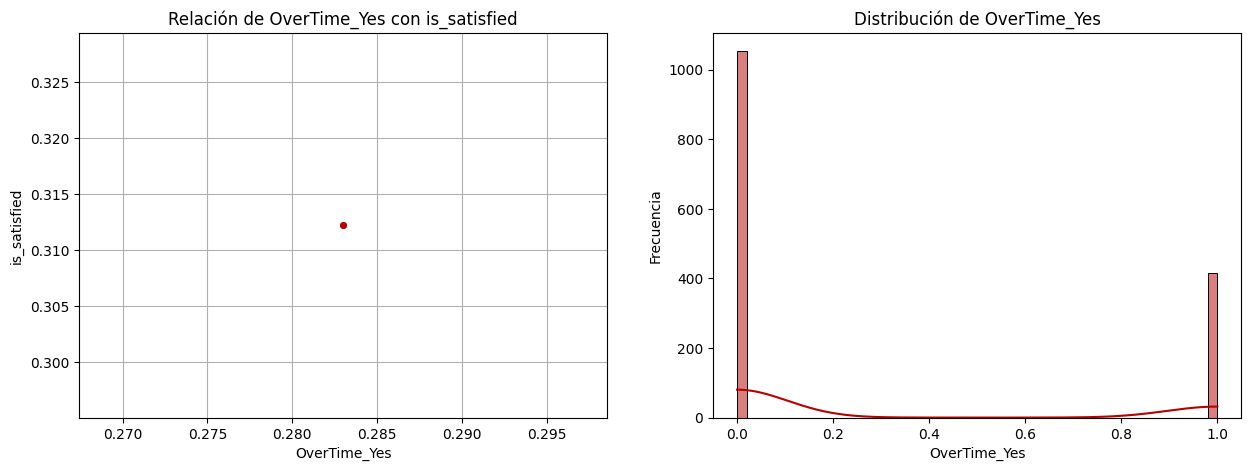

In [741]:
bivariado(df)

#### **Modelo**

Se pide que el modelo tenga: 

test set: 20%
random_state: 42

#### Escalamiento

In [742]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Correlación

In [743]:
df.corr()['is_satisfied'].sort_values(ascending=False).head()

is_satisfied                    1.000000
EducationField_Life Sciences    0.044076
PercentSalaryHike               0.042461
Gender_Male                     0.040752
OverTime_Yes                    0.039452
Name: is_satisfied, dtype: float64

## **Modelos con CrossValidation**

#### **KNN Clasificador**
---

In [744]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param = {
    'knn__n_neighbors': np.arange(1,50), 
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'] 
}


##### - Random Search

In [745]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param, n_iter=200, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)


random_search.best_params_
probabilidades_knn = random_search.predict_proba(X_test)[:, 1]

print(random_search.best_params_)

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 196 is smaller than n_iter=200. Running 196 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'knn__weights': 'uniform', 'knn__n_neighbors': np.int64(36), 'knn__metric': 'euclidean'}


##### - Gridsearch

In [746]:
grid_search = GridSearchCV(pipeline, param, cv=5, n_jobs=-1, scoring='roc_auc')

grid_search.fit(X_train, y_train)

probabilidades_knn2 = grid_search.predict_proba(X_test)[:, 1]


#### **Regresión Logística**
---

In [747]:
# Pipeline 
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)), 
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=500, random_state=42))
])

params_grid= {
    'poly__degree': [1, 2, 3],
    'logreg__C': ['l2', None],
    'logreg__C': [0.01,0.1,1]
}

##### RandomSearch


In [748]:
log_reg_random= RandomizedSearchCV(estimator=pipeline, param_distributions=params_grid, n_iter=5, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_random.fit(X_train, y_train)

probabilidades_logisticarandom = log_reg_random.best_estimator_.predict_proba(X_test)[:,1]

##### - Gridsearch

In [749]:
log_reg_grid= GridSearchCV(estimator=pipeline, param_grid=params_grid, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_grid.fit(X_train, y_train)

probabilidades_logisticagrid = log_reg_grid.best_estimator_.predict_proba(X_test)[:,1]


#### **Red Neuronal**

---

In [750]:
# Pipeline
pipeline= Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier())
])

params= {
    'nn__hidden_layer_sizes': [(100,100),(100,100,100),(100,100,100,100)], 
    'nn__activation':['relu', 'tanh', 'logistic'],
    'nn__alpha': [0.01,0.1,1],
}

##### - RandomSearch

In [751]:

neuro_random = RandomizedSearchCV(estimator=pipeline, param_distributions=params, n_iter=5, cv=5, n_jobs=-1, scoring='roc_auc')
neuro_random.fit(X_train, y_train)

probabilidades_neurorandom = neuro_random.best_estimator_.predict_proba(X_test)[:, 1]

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


##### - Gridsearch

In [752]:
grid_neuro= GridSearchCV(estimator=pipeline, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_neuro.fit(X_train, y_train)
probabilidades_neurogrid = grid_neuro.best_estimator_.predict_proba(X_test)[:, 1]

#### **Analisis de Discriminante Lineal**
---

In [753]:
pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('model', discriminant_analysis.LinearDiscriminantAnalysis())
])

pipeline.fit(X_train, y_train)
probabilidades_modelo_disc = pipeline.predict_proba(X_test)[:, 1]

#### **Juntos**

In [754]:
juntos = pd.DataFrame({
     'real': y_test,     
     'probabilidades_knn': probabilidades_knn,
     'probabilidades_knn2': probabilidades_knn2,
     'logisticarandom': probabilidades_logisticarandom,
     'logisticagrid': probabilidades_logisticagrid,
     'NeuroRandom': probabilidades_neurorandom,
     'NeuroGrid': probabilidades_neurogrid,
     'probabilidades_disc': probabilidades_modelo_disc

})

juntos.head()

,real,probabilidades_knn,probabilidades_knn2,logisticarandom,logisticagrid,NeuroRandom,NeuroGrid,probabilidades_disc
515,False,0.361111,0.529412,0.336960,0.537674,0.196974,0.976342,0.335046
306,False,0.388889,0.294118,0.425752,0.342866,0.038776,0.000907,0.428238
1255,False,0.444444,0.470588,0.323129,0.222006,0.999675,0.996566,0.329757
378,True,0.361111,0.176471,0.161965,0.010675,0.000002,0.024689,0.167808
332,False,0.333333,0.235294,0.365242,0.090639,0.001603,0.336877,0.358524


In [755]:
# Bins
bins = 5
juntos['bins_log1'] = pd.qcut(juntos['logisticarandom'], bins, labels=False) + 1
juntos['bins_log2'] = pd.qcut(juntos['logisticagrid'], bins, labels=False) + 1

juntos['bins_knn1'] = pd.qcut(juntos['probabilidades_knn'], bins, labels=False) + 1
juntos['bins_knn2'] = pd.qcut(juntos['probabilidades_knn2'], bins, labels=False) + 1
juntos['bins_neuralrand'] = pd.qcut(juntos['NeuroRandom'], bins, labels=False) + 1
juntos['bins_neuralgrid'] = pd.qcut(juntos['NeuroGrid'], bins, labels=False) + 1
juntos['bins_disc'] = pd.qcut(juntos['probabilidades_disc'], bins, labels=False) + 1

# Agrupaciones
grouped_log1 = juntos.groupby('bins_log1').mean()
grouped_log2 = juntos.groupby('bins_log2').mean()
grouped_knn1 = juntos.groupby('bins_knn1').mean()
grouped_knn2 = juntos.groupby('bins_knn2').mean()
grouped_neuralrand = juntos.groupby('bins_neuralrand').mean()
grouped_neuralgrid = juntos.groupby('bins_neuralgrid').mean()
grouped_disc = juntos.groupby('bins_disc').mean()


## **Histograma, Calibración, roc AUC y AUC por Modelo**

#### **KNN Clasificador**
---



##### - RandomSearch

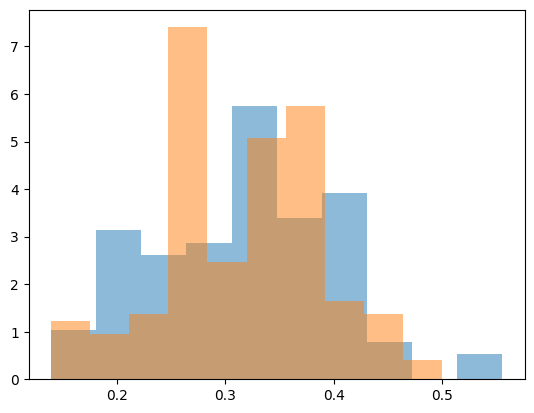

In [756]:
plt.hist(juntos[juntos.real == 1].probabilidades_knn, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_knn, density=True, alpha=0.5, bins=10)
plt.show()

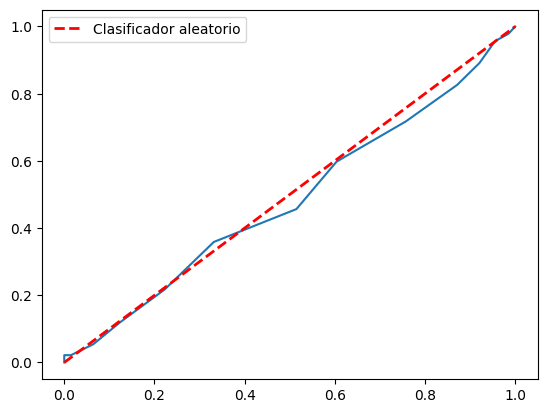

In [757]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_knn, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


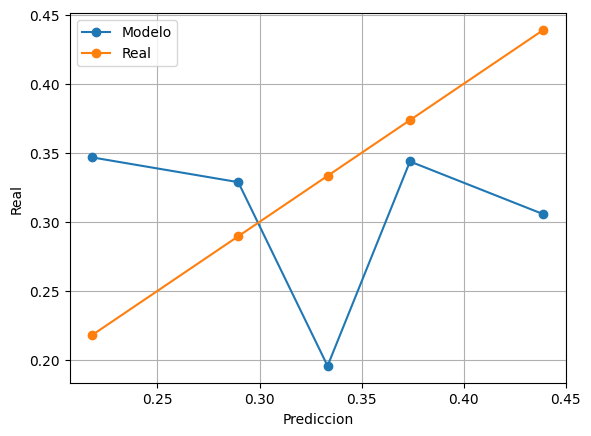

In [758]:
calibracion(probabilidades_knn, y_test, 5)

In [759]:
print('AUC RandomSearch: ',roc_auc_score(y_true=y_test,y_score= probabilidades_knn ))

AUC RandomSearch:  0.48380327163151093


##### - Gridsearch

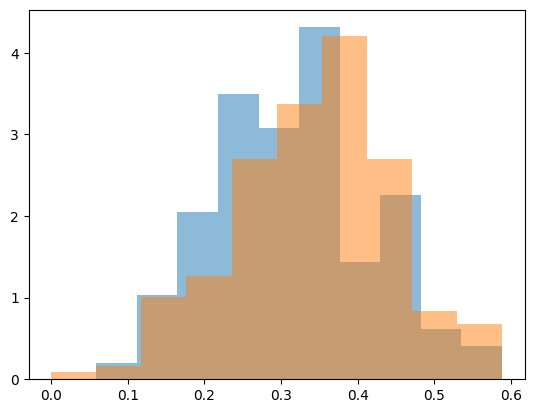

In [760]:
plt.hist(juntos[juntos.real == 1].probabilidades_knn2, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_knn2, density=True, alpha=0.5, bins=10)
plt.show()

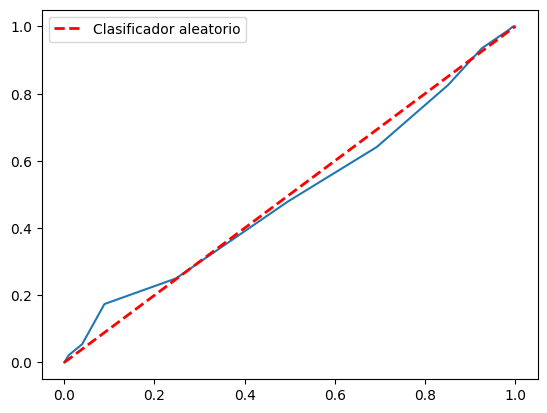

In [761]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_knn2, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


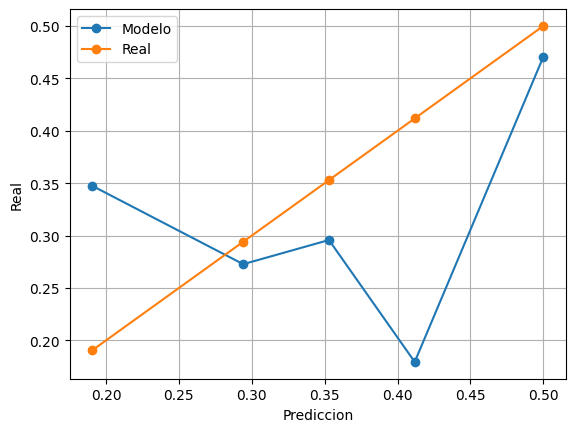

In [762]:
calibracion(probabilidades_knn2, y_test, 5)

In [763]:
print('AUC Gridsearch: ',roc_auc_score( y_true=y_test, y_score= probabilidades_knn2))

AUC Gridsearch:  0.49499569522169606


#### **Regresión Logistica**

---

##### - RandomSearch

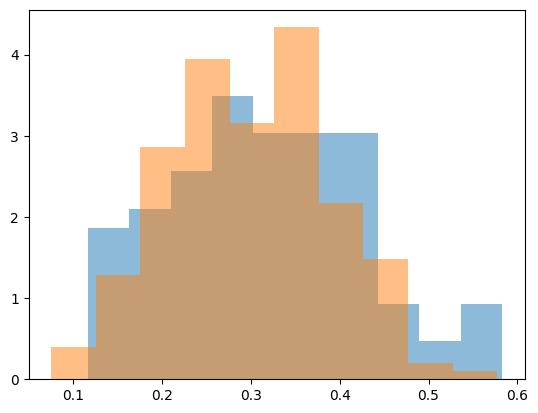

In [764]:
plt.hist(juntos[juntos.real == 1].logisticarandom, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logisticarandom, density=True, alpha=0.5, bins=10)
plt.show()

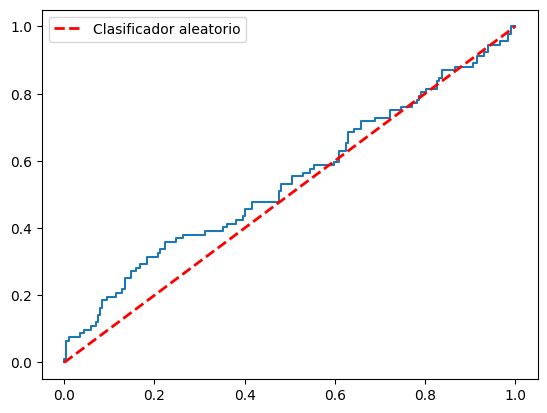

In [765]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_logisticarandom, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


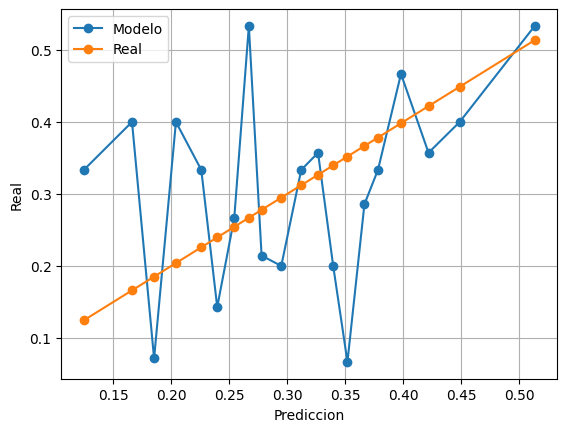

In [766]:
calibracion(probabilidades_logisticarandom, y_test, 20)

In [767]:
log_reg_random.best_params_

{'poly__degree': 1, 'logreg__C': 1}

In [768]:
print('AUC: ',roc_auc_score(y_score= probabilidades_logisticarandom, y_true=y_test))

AUC:  0.5422944468359879


##### - Gridsearch

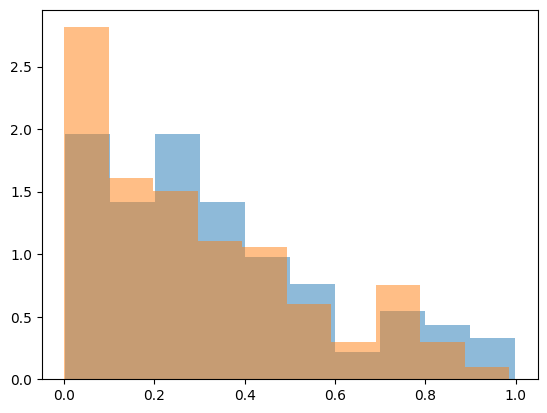

In [769]:
plt.hist(juntos[juntos.real == 1].logisticagrid, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logisticagrid, density=True, alpha=0.5, bins=10)
plt.show()

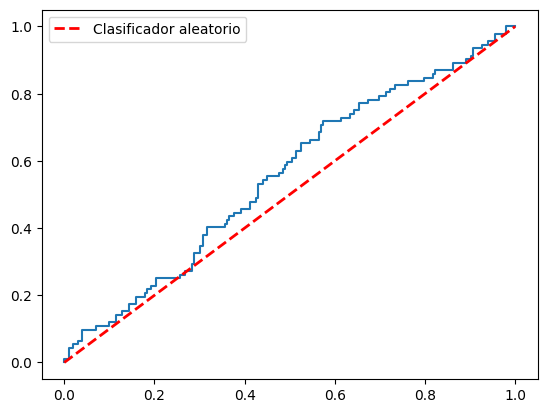

In [770]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_logisticagrid, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


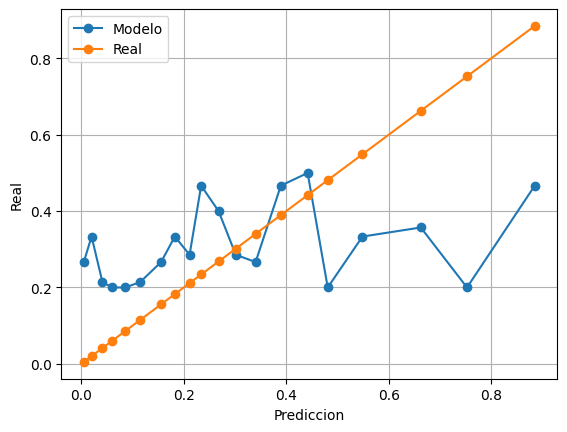

In [771]:
calibracion(probabilidades_logisticagrid, y_test, 20)

In [772]:
log_reg_grid.best_params_

{'logreg__C': 0.1, 'poly__degree': 2}

In [773]:
print('AUC: ',roc_auc_score(y_score= probabilidades_logisticagrid, y_true=y_test))

AUC:  0.5540787774429616


#### **Red Neuronal**
---

##### - RandomSearch

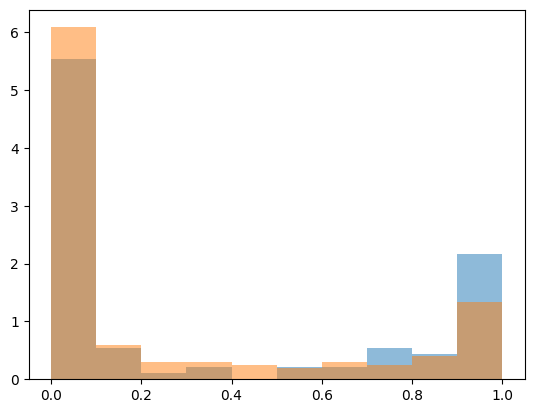

In [774]:
plt.hist(juntos[juntos.real == 1].NeuroRandom, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].NeuroRandom, density=True, alpha=0.5, bins=10)
plt.show()

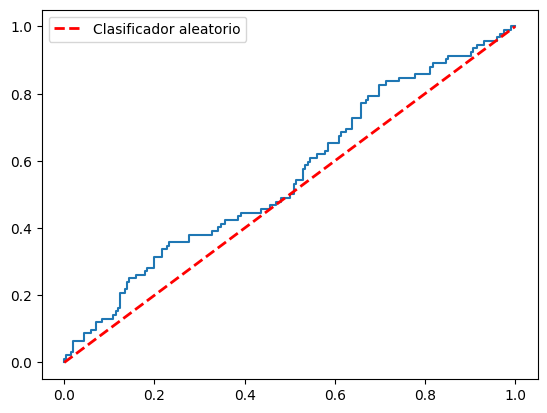

In [775]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_neurorandom, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

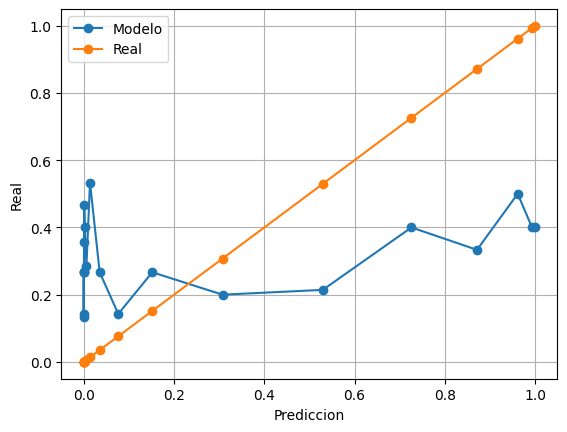

In [776]:
calibracion(probabilidades_neurorandom, y_test, 20)

In [777]:
print('AUC RandomSearch:', roc_auc_score(y_score=probabilidades_neurorandom, y_true=y_test))

AUC RandomSearch: 0.5563925957813173


##### - Gridsearch

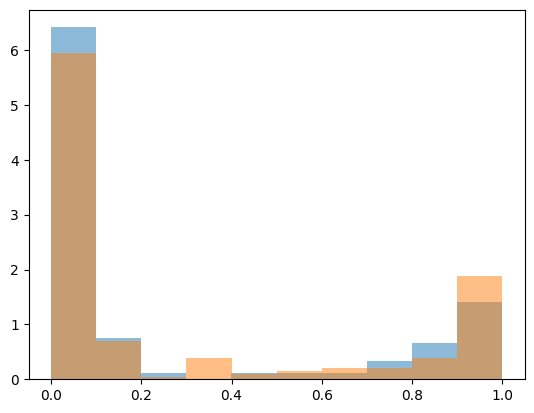

In [778]:
plt.hist(juntos[juntos.real == 1].NeuroGrid, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].NeuroGrid, density=True, alpha=0.5, bins=10)
plt.show()

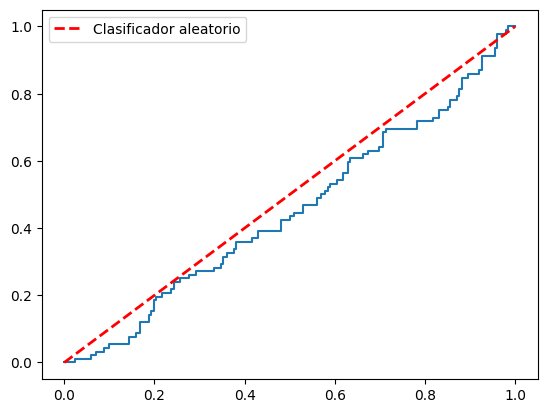

In [779]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_neurogrid, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

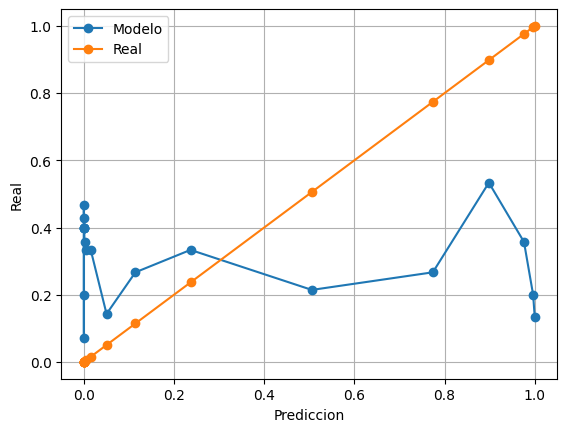

In [780]:
calibracion(probabilidades_neurogrid, y_test, 20)

In [781]:
print('AUC Gridsearch:', roc_auc_score(y_score=probabilidades_neurogrid, y_true=y_test))

AUC Gridsearch: 0.45011838140335775


##### **Discriminante Lineal**

---

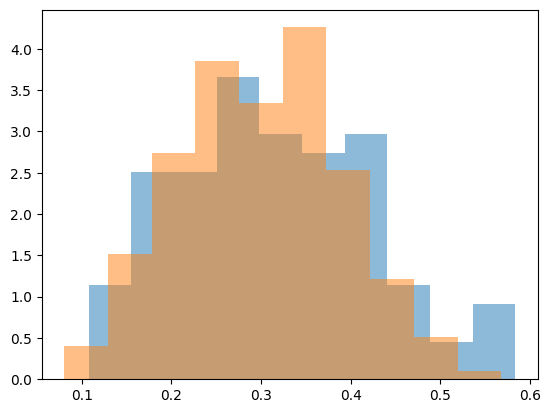

In [782]:
plt.hist(juntos[juntos.real == 1].probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.show()

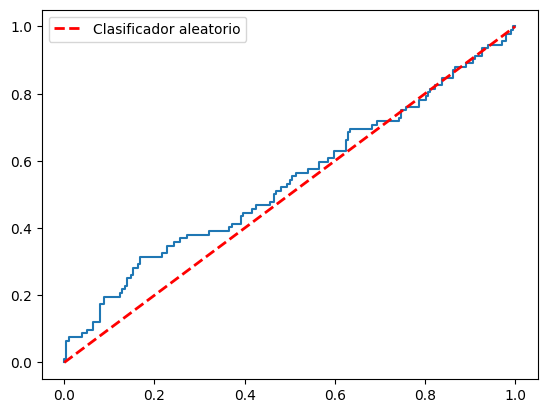

In [783]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo_disc, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

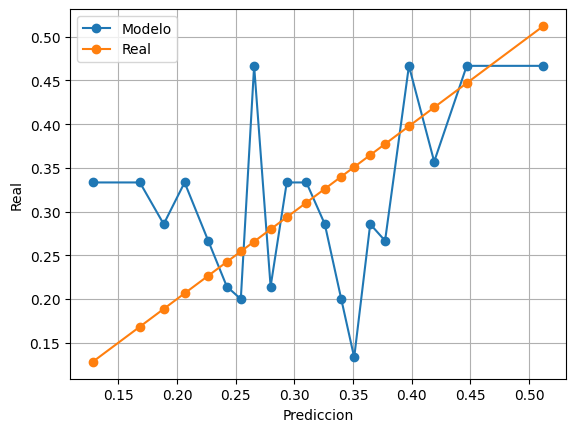

In [784]:
calibracion(probabilidades_modelo_disc, y_test, 20)

In [785]:
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo_disc, y_true=y_test))

AUC:  0.5391196728368489


##### Juntos

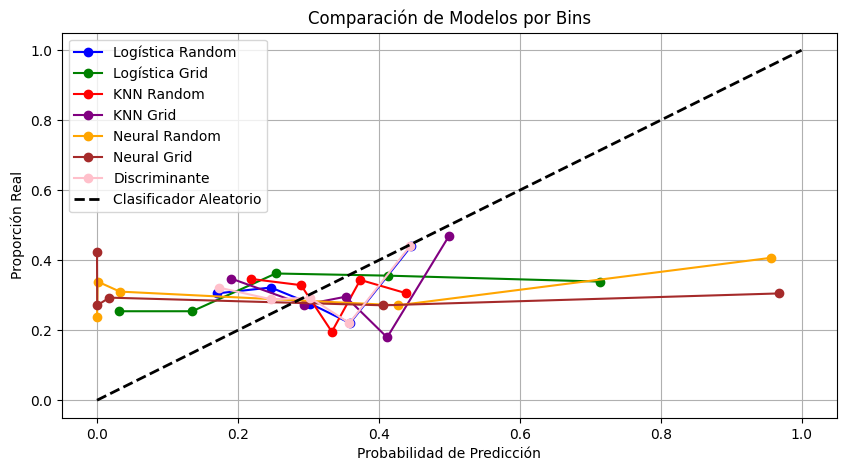

In [786]:
import matplotlib.pyplot as plt

# Definir los colores para las líneas
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'black']

# Crear la figura
plt.figure(figsize=(10, 5))

# Regresión Logística 
plt.plot(grouped_log1.logisticarandom, grouped_log1.real, marker='o', label='Logística Random', color=colors[0])
plt.plot(grouped_log2.logisticagrid, grouped_log2.real, marker='o', label='Logística Grid', color=colors[1])

# KNN
plt.plot(grouped_knn1.probabilidades_knn, grouped_knn1.real, marker='o', label='KNN Random', color=colors[2])
plt.plot(grouped_knn2.probabilidades_knn2, grouped_knn2.real, marker='o', label='KNN Grid', color=colors[3])

# Neuronal
plt.plot(grouped_neuralrand.NeuroRandom, grouped_neuralrand.real, marker='o', label='Neural Random', color=colors[4])
plt.plot(grouped_neuralgrid.NeuroGrid, grouped_neuralgrid.real, marker='o', label='Neural Grid', color=colors[5])

#Discriminante
plt.plot(grouped_disc.probabilidades_disc, grouped_disc.real, marker='o', label='Discriminante', color=colors[6])

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, label='Clasificador Aleatorio', color=colors[-1])


plt.legend()
plt.grid()
plt.xlabel('Probabilidad de Predicción')
plt.ylabel('Proporción Real')
plt.title('Comparación de Modelos por Bins')

# Mostrar el gráfico
plt.show()



#### AUC Modelos


In [787]:
AUC = pd.DataFrame({
    'knn_random': [roc_auc_score(y_score=probabilidades_knn, y_true=y_test)],
    'knn_grid': [roc_auc_score(y_score=probabilidades_knn2, y_true=y_test)],
    'RL_random': [roc_auc_score(y_score=probabilidades_logisticarandom, y_true=y_test)],
    'RL_grid': [roc_auc_score(y_score=probabilidades_logisticagrid, y_true=y_test)],
    'R.Neuronal_random': [roc_auc_score(y_score=probabilidades_neurorandom, y_true=y_test)],
    'R.Neuronal_grid': [roc_auc_score(y_score=probabilidades_neurogrid, y_true=y_test)],
    'Analisis del discriminante lineal': [roc_auc_score(y_score=probabilidades_modelo_disc, y_true=y_test)],
    
})

print('AUC:')
AUC

AUC:


,knn_random,knn_grid,RL_random,RL_grid,R.Neuronal_random,R.Neuronal_grid,Analisis del discriminante lineal
0,0.483803,0.494996,0.542294,0.554079,0.556393,0.450118,0.53912


Tras calcular los modelos sin aplicar Feature Engineering, el mejor desempeño en AUC lo obtuvo el modelo de Redes Neuronales con Random Search, alcanzando un valor de 0.556393. Aunque este resultado no es óptimo, sigue siendo el más efectivo en la distinción de clases comparado con los otros modelos. En términos prácticos, esto sugiere que el modelo tiene un 55.6393% de probabilidad de predecir correctamente si un usuario está satisfecho (`is_satisfied`). Sin embargo, esto indica que aún hay alto margen de mejora , podemos decir si aplicamos feature engineering u otra cosa , podríamos llegar a mejorar el modelo y en su distincón de clases.

Veremos si aplicando Feature Engineering logramos mejorar el modelo...

### **Modelos con Feature Engineering**

#### Feature Engineering

In [788]:
df.corr()['is_satisfied'].sort_values(ascending=False)

is_satisfied                         1.000000
EducationField_Life Sciences         0.044076
PercentSalaryHike                    0.042461
Gender_Male                          0.040752
OverTime_Yes                         0.039452
JobRole_Sales Executive              0.036071
PerformanceRating                    0.034319
MaritalStatus_Single                 0.032247
Department_Sales                     0.024711
BusinessTravel_Travel_Frequently     0.024431
StockOptionLevel                     0.023456
EnvironmentSatisfaction              0.017072
JobRole_Research Scientist           0.014072
TrainingTimesLastYear                0.010379
EducationField_Other                 0.008929
JobRole_Manager                      0.006649
EducationField_Marketing             0.006395
DailyRate                           -0.000695
JobRole_Laboratory Technician       -0.003358
MonthlyIncome                       -0.004324
YearsInCurrentRole                  -0.004955
YearsAtCompany                    

In [789]:
df.drop('StandardHours', axis=1, inplace=True)

In [790]:
numeric_features = [col for col in X.columns if X[col].dtype in ['float64']]
categorical_features = [col for col in X.columns if X[col].dtype not in ['float64']]

In [791]:
df['OverTime_Yes*EnvironmentSatisfaction'] = df['OverTime_Yes'] / df['EnvironmentSatisfaction']
df['PercentSalaryHike/Department_Sales'] = df['PercentSalaryHike'] / (df['Department_Sales'] + 1)

df['Log_PercentS'] = np.log(df['PercentSalaryHike'])  # Logaritmo de carreras anotadas en la carrera
df['Log_OverTime_Yes'] = np.sqrt(df['OverTime_Yes'])  # Raíz cuadrada de los hits en la carrera


df['MonthlyRate^2'] = df['MonthlyRate'] ** 2
df['PercentSalaryHike^2'] = df['PercentSalaryHike'] ** 2



In [792]:
pd.DataFrame(df.isnull().sum()).T

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,OverTime_Yes*EnvironmentSatisfaction,PercentSalaryHike/Department_Sales,Log_PercentS,Log_OverTime_Yes,MonthlyRate^2,PercentSalaryHike^2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [793]:
target= 'is_satisfied'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### **KNN Clasificador**
---

In [794]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param = {
    'knn__n_neighbors': np.arange(1,50), 
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'] 
}


##### - Random Search

In [795]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param, n_iter=200, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)


random_search.best_params_
probabilidades_knn = random_search.predict_proba(X_test)[:, 1]

print(random_search.best_params_)

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 196 is smaller than n_iter=200. Running 196 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'knn__weights': 'uniform', 'knn__n_neighbors': np.int64(46), 'knn__metric': 'euclidean'}


##### - Gridsearch

In [796]:
grid_search = GridSearchCV(pipeline, param, cv=5, n_jobs=-1, scoring='roc_auc')

grid_search.fit(X_train, y_train)

probabilidades_knn2 = grid_search.predict_proba(X_test)[:, 1]


#### **Regresión Logística**
---

In [797]:
# Pipeline 
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)), 
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=500, random_state=42))
])

params_grid= {
    'poly__degree': [1, 2, 3],
    'logreg__C': ['l2', None],
    'logreg__C': [0.01,0.1,1]
}

##### RandomSearch


In [798]:
log_reg_random= RandomizedSearchCV(estimator=pipeline, param_distributions=params_grid, n_iter=5, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_random.fit(X_train, y_train)

probabilidades_logisticarandom = log_reg_random.best_estimator_.predict_proba(X_test)[:,1]

##### - Gridsearch

In [799]:
log_reg_grid= GridSearchCV(estimator=pipeline, param_grid=params_grid, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_grid.fit(X_train, y_train)

probabilidades_logisticagrid = log_reg_grid.best_estimator_.predict_proba(X_test)[:,1]


#### **Red Neuronal**

---

In [800]:
# Pipeline
pipeline= Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier())
])

params= {
    'nn__hidden_layer_sizes': [(100,100),(100,100,100),(100,100,100,100)], 
    'nn__activation':['relu', 'tanh', 'logistic'],
    'nn__alpha': [0.01,0.1,1],
}

##### - RandomSearch

In [801]:

neuro_random = RandomizedSearchCV(estimator=pipeline, param_distributions=params, n_iter=5, cv=5, n_jobs=-1, scoring='roc_auc')
neuro_random.fit(X_train, y_train)

probabilidades_neurorandom = neuro_random.best_estimator_.predict_proba(X_test)[:, 1]

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


##### - Gridsearch

In [802]:
grid_neuro= GridSearchCV(estimator=pipeline, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_neuro.fit(X_train, y_train)
probabilidades_neurogrid = grid_neuro.best_estimator_.predict_proba(X_test)[:, 1]

#### **Analisis de Discriminante Lineal**
---

In [803]:
pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('model', discriminant_analysis.LinearDiscriminantAnalysis())
])

pipeline.fit(X_train, y_train)
probabilidades_modelo_disc = pipeline.predict_proba(X_test)[:, 1]

#### **Juntos**

In [804]:
juntos = pd.DataFrame({
     'real': y_test,     
     'probabilidades_knn': probabilidades_knn,
     'probabilidades_knn2': probabilidades_knn2,
     'logisticarandom': probabilidades_logisticarandom,
     'logisticagrid': probabilidades_logisticagrid,
     'NeuroRandom': probabilidades_neurorandom,
     'NeuroGrid': probabilidades_neurogrid,
     'probabilidades_disc': probabilidades_modelo_disc

})

juntos.head()

,real,probabilidades_knn,probabilidades_knn2,logisticarandom,logisticagrid,NeuroRandom,NeuroGrid,probabilidades_disc
515,False,0.260870,0.752900,0.355497,0.348721,0.999733,0.999995,0.348272
306,False,0.391304,0.000000,0.390083,0.428839,0.032621,0.188563,0.445853
1255,False,0.413043,0.494484,0.353998,0.366142,0.000164,0.838037,0.384521
378,True,0.369565,0.244687,0.252967,0.191885,0.030308,0.000001,0.176781
332,False,0.304348,0.233182,0.342008,0.375037,0.001143,0.000041,0.385699


In [805]:
# Bins
bins = 5
juntos['bins_log1'] = pd.qcut(juntos['logisticarandom'], bins, labels=False) + 1
juntos['bins_log2'] = pd.qcut(juntos['logisticagrid'], bins, labels=False) + 1

juntos['bins_knn1'] = pd.qcut(juntos['probabilidades_knn'], bins, labels=False) + 1
juntos['bins_knn2'] = pd.qcut(juntos['probabilidades_knn2'], bins, labels=False, duplicates='drop') + 1
juntos['bins_neuralrand'] = pd.qcut(juntos['NeuroRandom'], bins, labels=False) + 1
juntos['bins_neuralgrid'] = pd.qcut(juntos['NeuroGrid'], bins, labels=False, duplicates='drop') + 1
juntos['bins_disc'] = pd.qcut(juntos['probabilidades_disc'], bins, labels=False) + 1

# Agrupaciones
grouped_log1 = juntos.groupby('bins_log1').mean()
grouped_log2 = juntos.groupby('bins_log2').mean()
grouped_knn1 = juntos.groupby('bins_knn1').mean()
grouped_knn2 = juntos.groupby('bins_knn2').mean()
grouped_neuralrand = juntos.groupby('bins_neuralrand').mean()
grouped_neuralgrid = juntos.groupby('bins_neuralgrid').mean()
grouped_disc = juntos.groupby('bins_disc').mean()


## **Histograma, Calibración, roc AUC y AUC por Modelo**

#### **KNN Clasificador**
---



##### - RandomSearch

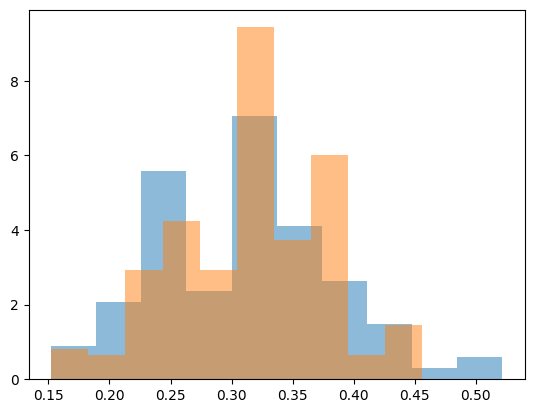

In [806]:
plt.hist(juntos[juntos.real == 1].probabilidades_knn, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_knn, density=True, alpha=0.5, bins=10)
plt.show()

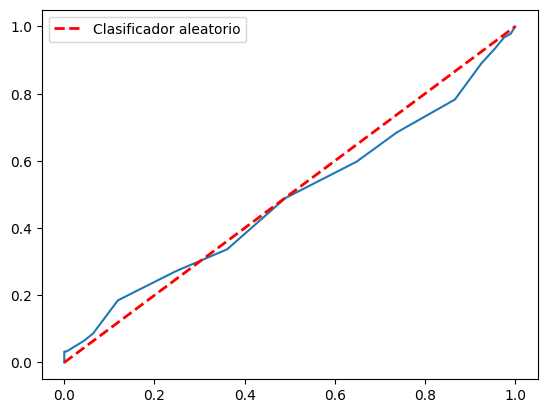

In [807]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_knn, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


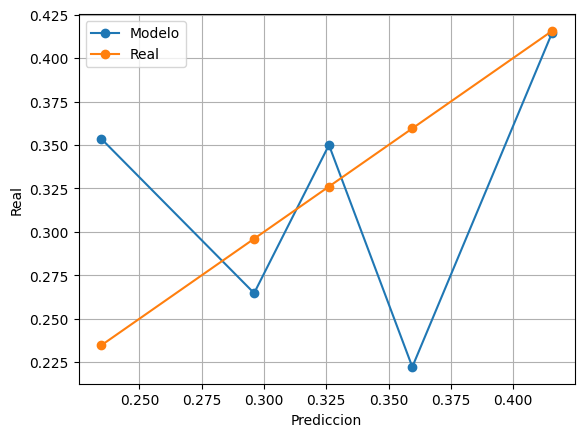

In [808]:
calibracion(probabilidades_knn, y_test, 5)

In [809]:
print('AUC RandomSearch: ',roc_auc_score(y_true=y_test,y_score= probabilidades_knn ))

AUC RandomSearch:  0.4857942315970727


##### - Gridsearch

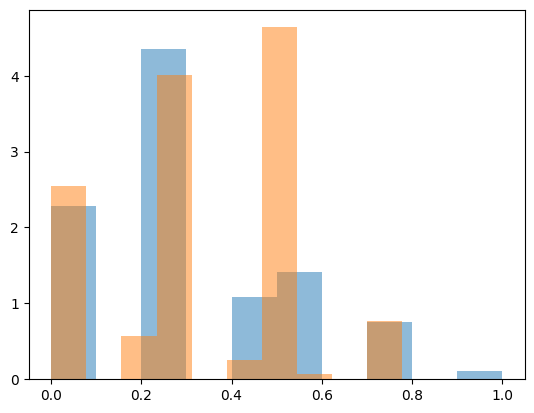

In [810]:
plt.hist(juntos[juntos.real == 1].probabilidades_knn2, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_knn2, density=True, alpha=0.5, bins=10)
plt.show()

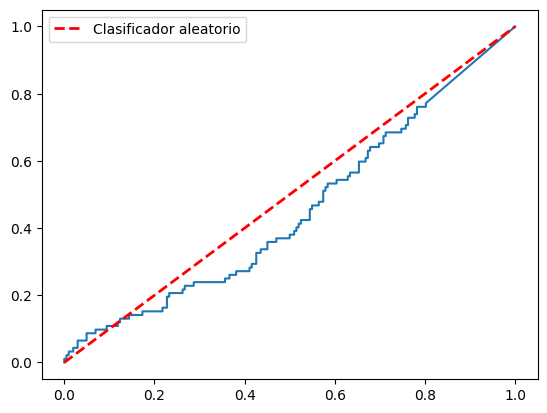

In [811]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_knn2, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


In [812]:
print('AUC Gridsearch: ',roc_auc_score( y_true=y_test, y_score= probabilidades_knn2))

AUC Gridsearch:  0.4508179078777443


#### **Regresión Logistica**

---

##### - RandomSearch

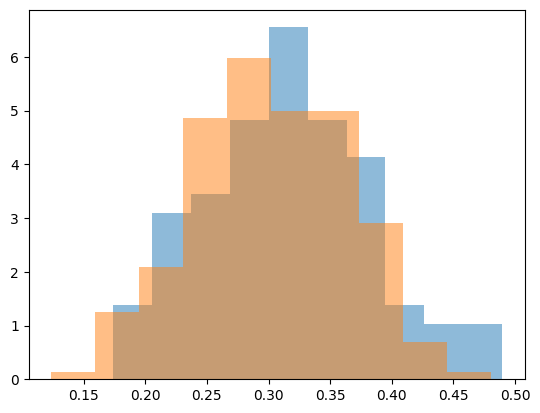

In [813]:
plt.hist(juntos[juntos.real == 1].logisticarandom, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logisticarandom, density=True, alpha=0.5, bins=10)
plt.show()

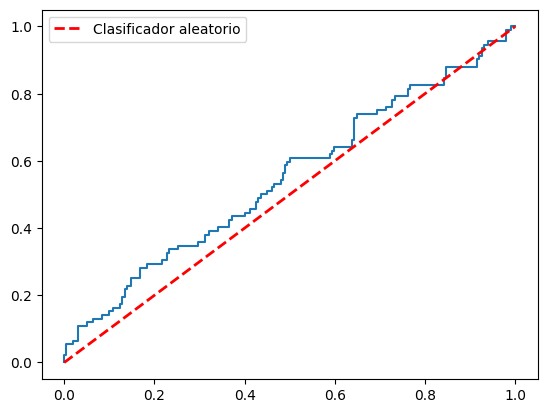

In [814]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_logisticarandom, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


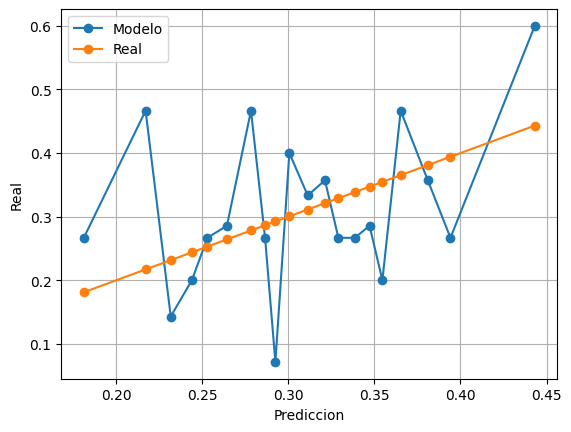

In [815]:
calibracion(probabilidades_logisticarandom, y_test, 20)

In [816]:
log_reg_random.best_params_

{'poly__degree': 1, 'logreg__C': 0.01}

In [817]:
print('AUC: ',roc_auc_score(y_score= probabilidades_logisticarandom, y_true=y_test))

AUC:  0.5478906586310806


##### - Gridsearch

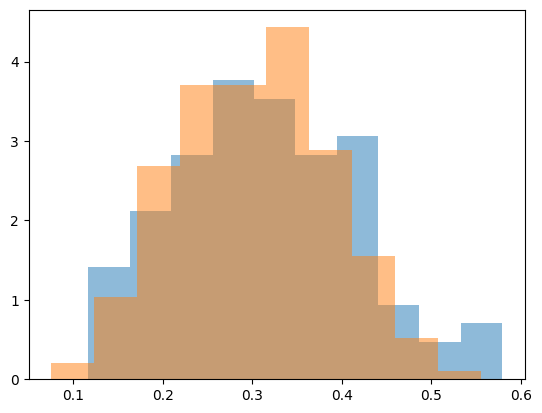

In [818]:
plt.hist(juntos[juntos.real == 1].logisticagrid, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logisticagrid, density=True, alpha=0.5, bins=10)
plt.show()

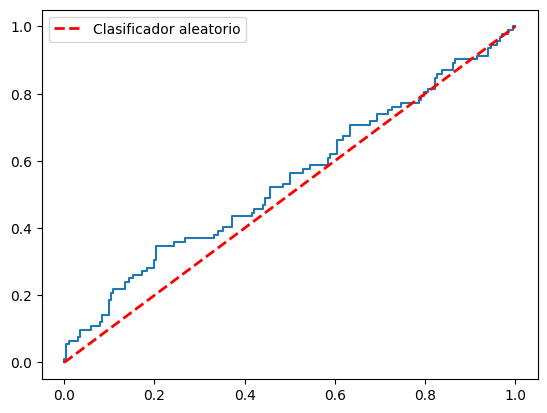

In [819]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_logisticagrid, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


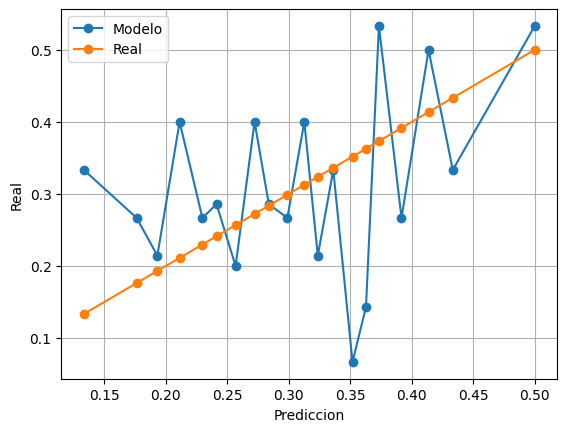

In [820]:
calibracion(probabilidades_logisticagrid, y_test, 20)

In [821]:
log_reg_grid.best_params_

{'logreg__C': 0.1, 'poly__degree': 1}

In [822]:
print('AUC: ',roc_auc_score(y_score= probabilidades_logisticagrid, y_true=y_test))

AUC:  0.5435858803271632


#### **Red Neuronal**
---

##### - RandomSearch

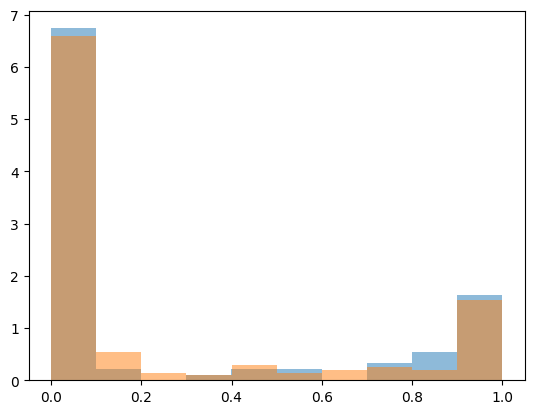

In [823]:
plt.hist(juntos[juntos.real == 1].NeuroRandom, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].NeuroRandom, density=True, alpha=0.5, bins=10)
plt.show()

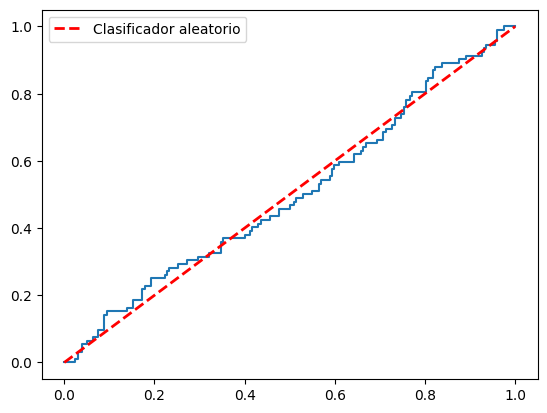

In [824]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_neurorandom, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

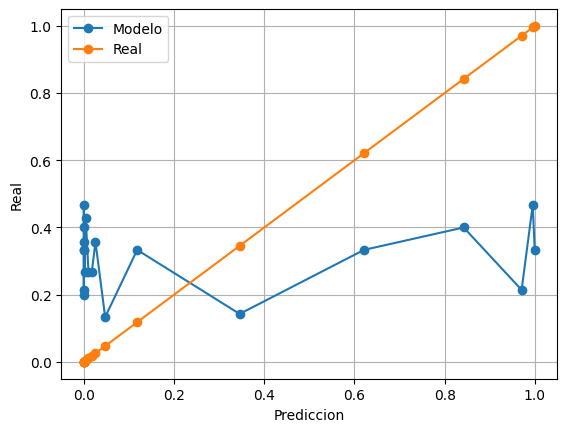

In [825]:
calibracion(probabilidades_neurorandom, y_test, 20)

In [826]:
print('AUC RandomSearch:', roc_auc_score(y_score=probabilidades_neurorandom, y_true=y_test))

AUC RandomSearch: 0.5012376237623762


##### - Gridsearch

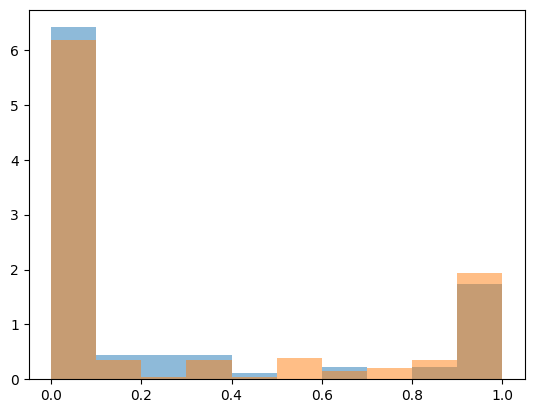

In [827]:
plt.hist(juntos[juntos.real == 1].NeuroGrid, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].NeuroGrid, density=True, alpha=0.5, bins=10)
plt.show()

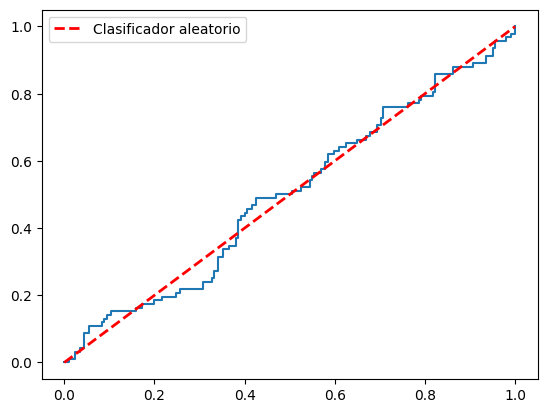

In [828]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_neurogrid, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

In [829]:
print('AUC Gridsearch:', roc_auc_score(y_score=probabilidades_neurogrid, y_true=y_test))

AUC Gridsearch: 0.49908523461041754


##### **Discriminante Lineal**

---

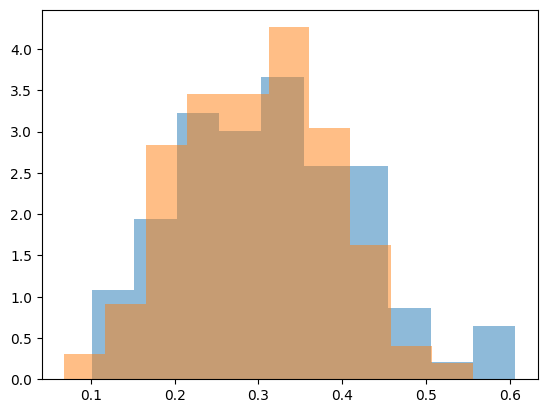

In [830]:
plt.hist(juntos[juntos.real == 1].probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.show()

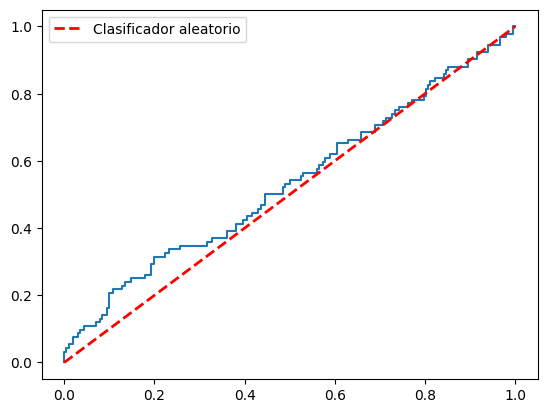

In [831]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo_disc, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

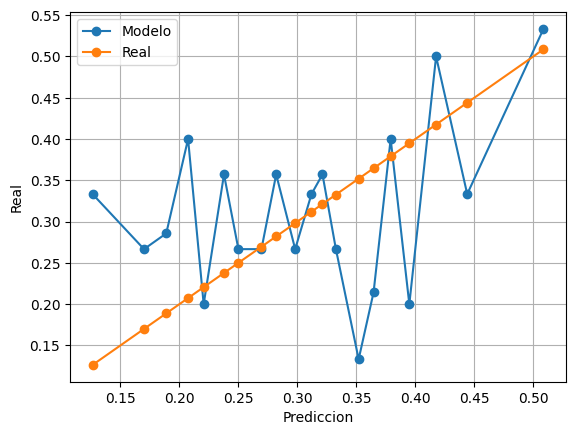

In [832]:
calibracion(probabilidades_modelo_disc, y_test, 20)

In [833]:
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo_disc, y_true=y_test))

AUC:  0.533953938872148


##### Juntos

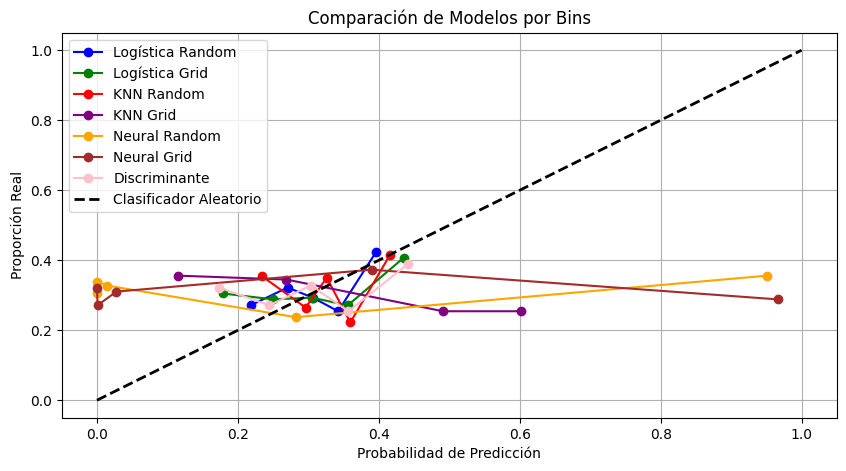

In [834]:
import matplotlib.pyplot as plt

# Definir los colores para las líneas
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'black']

# Crear la figura
plt.figure(figsize=(10, 5))

# Regresión Logística 
plt.plot(grouped_log1.logisticarandom, grouped_log1.real, marker='o', label='Logística Random', color=colors[0])
plt.plot(grouped_log2.logisticagrid, grouped_log2.real, marker='o', label='Logística Grid', color=colors[1])

# KNN
plt.plot(grouped_knn1.probabilidades_knn, grouped_knn1.real, marker='o', label='KNN Random', color=colors[2])
plt.plot(grouped_knn2.probabilidades_knn2, grouped_knn2.real, marker='o', label='KNN Grid', color=colors[3])

# Neuronal
plt.plot(grouped_neuralrand.NeuroRandom, grouped_neuralrand.real, marker='o', label='Neural Random', color=colors[4])
plt.plot(grouped_neuralgrid.NeuroGrid, grouped_neuralgrid.real, marker='o', label='Neural Grid', color=colors[5])

#Discriminante
plt.plot(grouped_disc.probabilidades_disc, grouped_disc.real, marker='o', label='Discriminante', color=colors[6])

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, label='Clasificador Aleatorio', color=colors[-1])


plt.legend()
plt.grid()
plt.xlabel('Probabilidad de Predicción')
plt.ylabel('Proporción Real')
plt.title('Comparación de Modelos por Bins')

# Mostrar el gráfico
plt.show()



#### AUC Modelos Feature Engineering


In [835]:
AUC = pd.DataFrame({
    'knn_random': [roc_auc_score(y_score=probabilidades_knn, y_true=y_test)],
    'knn_grid': [roc_auc_score(y_score=probabilidades_knn2, y_true=y_test)],
    'RL_random': [roc_auc_score(y_score=probabilidades_logisticarandom, y_true=y_test)],
    'RL_grid': [roc_auc_score(y_score=probabilidades_logisticagrid, y_true=y_test)],
    'R.Neuronal_random': [roc_auc_score(y_score=probabilidades_neurorandom, y_true=y_test)],
    'R.Neuronal_grid': [roc_auc_score(y_score=probabilidades_neurogrid, y_true=y_test)],
    'Analisis del discriminante lineal': [roc_auc_score(y_score=probabilidades_modelo_disc, y_true=y_test)],
    
})

print('AUC:')
AUC

AUC:


,knn_random,knn_grid,RL_random,RL_grid,R.Neuronal_random,R.Neuronal_grid,Analisis del discriminante lineal
0,0.485794,0.450818,0.547891,0.543586,0.501238,0.499085,0.533954


Después de aplicar Feature Engineering, no se logró una mejora significativa en la capacidad de distinción de clases. Sin embargo, el modelo de Regresión Logística con Random Search obtuvo el mejor desempeño con Feature Engineering, alcanzando un AUC de 0.543586. Aunque este resultado sigue siendo limitado, indica que la Regresión Logística fue la opción más efectiva dentro de los modelos realizados. 

## Conclusión